In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [128]:
credit = pd.read_excel('C:/Users/AJ/Documents/Workspace/default_credit.xls')
credit.rename(columns = {'default payment next month':'DEFAULTERS'}, inplace = True)
credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  ...  BILL_AMT4  \
0   1      20000    2          2         1   24      2      2     -1     -1  ...          0   
1   2     120000    2          2         2   26     -1      2      0      0  ...       3272   
2   3      90000    2          2         2   34      0      0      0      0  ...      14331   
3   4      50000    2          2         1   37      0      0      0      0  ...      28314   
4   5      50000    1          2         1   57     -1      0     -1      0  ...      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULTERS  
0          0          0         0       689         0         0         0         0           1  
1       3455       3261         0      1000      1000      1000         0      2000           1  
2      14948      15549      1518      1500      1000      1000      1000      5000           0  
3      28959      29547      2000      2019      1200      1100      1069      1000           0  
4      19146      19131      2000     36681     10000      9000       689       679           0  

[5 rows x 25 columns]

In [129]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [4]:
credit.describe().T

count           mean            std       min       25%  \
ID          30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL   30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX         30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION   30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE    30000.0       1.551867       0.521970       0.0      1.00   
AGE         30000.0      35.485500       9.217904      21.0     28.00   
PAY_0       30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2       30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3       30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4       30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5       30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6       30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1   30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2   30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3   30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4   30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5   30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6   30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1    30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2    30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3    30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4    30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5    30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6    30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULTERS  30000.0       0.221200       0.415062       0.0      0.00   

                 50%        75%        max  
ID           15000.5   22500.25    30000.0  
LIMIT_BAL   140000.0  240000.00  1000000.0  
SEX              2.0       2.00        2.0  
EDUCATION        2.0       2.00        6.0  
MARRIAGE         2.0       2.00        3.0  
AGE             34.0      41.00       79.0  
PAY_0            0.0       0.00        8.0  
PAY_2            0.0       0.00        8.0  
PAY_3            0.0       0.00        8.0  
PAY_4            0.0       0.00        8.0  
PAY_5            0.0       0.00        8.0  
PAY_6            0.0       0.00        8.0  
BILL_AMT1    22381.5   67091.00   964511.0  
BILL_AMT2    21200.0   64006.25   983931.0  
BILL_AMT3    20088.5   60164.75  1664089.0  
BILL_AMT4    19052.0   54506.00   891586.0  
BILL_AMT5    18104.5   50190.50   927171.0  
BILL_AMT6    17071.0   49198.25   961664.0  
PAY_AMT1      2100.0    5006.00   873552.0  
PAY_AMT2      2009.0    5000.00  1684259.0  
PAY_AMT3      1800.0    4505.00   896040.0  
PAY_AMT4      1500.0    4013.25   621000.0  
PAY_AMT5      1500.0    4031.50   426529.0  
PAY_AMT6      1500.0    4000.00   528666.0  
DEFAULTERS       0.0       0.00        1.0

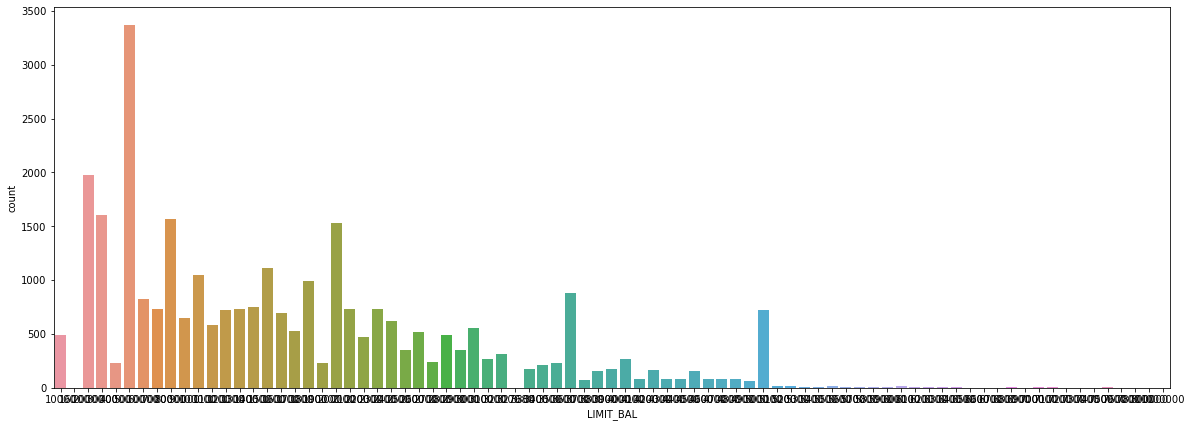

In [17]:
limit = sns.countplot(x='LIMIT_BAL', data=credit)
plt.gcf().set_size_inches(20,7)
plt.show()

Most of the customers using this bank or agency have been given an amount ranging from 10000-500000 in credit. (This includes individual and family/supplimentary credit) 

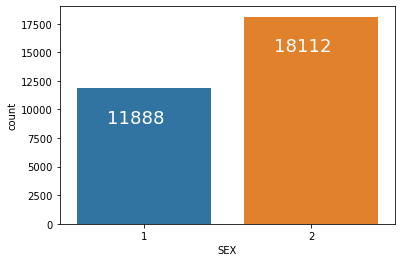

2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [63]:
sex = sns.countplot(x='SEX', data=credit)
for a in sex.patches:
    sex.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()
print(credit['SEX'].value_counts(normalize=True)*100)

Females make up for 60% of credit loans owners with this bank against 40% of Males

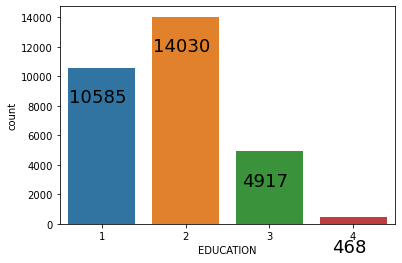

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: EDUCATION, dtype: float64


In [69]:
othersE = (credit.EDUCATION==0)|(credit.EDUCATION==5)|(credit.EDUCATION==6)
credit.loc[othersE,'EDUCATION']=4

edu = sns.countplot(x='EDUCATION', data=credit)
for a in edu.patches:
    edu.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(credit['EDUCATION'].value_counts(normalize=True)*100)

- Graduate school student make up for 46.7% of credit users with this bank
- University students make up for 35.3% of credit users with this bank 
- while high school students and others make up a combined 18% credit users with this bank

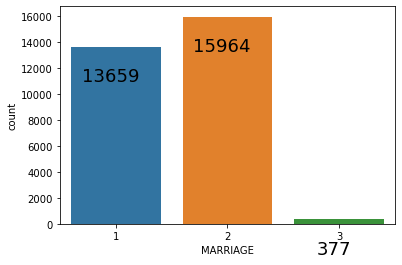

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64


In [72]:
othersM = (credit.MARRIAGE==4)
credit.loc[othersM,'MARRIAGE']=3

marriage = sns.countplot(x='MARRIAGE', data=credit)
for a in marriage.patches:
    marriage.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(credit['MARRIAGE'].value_counts(normalize=True)*100)

- Single people make up for 53.2% of the credit users
- Married people make up for 45.5% of the credit users
- While others make up for 1.3% of the credit users

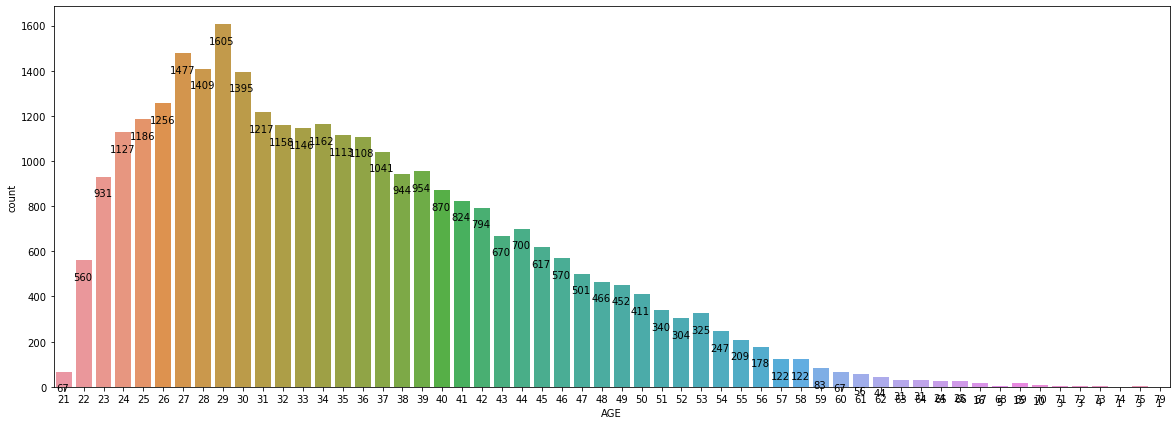

In [94]:
age = sns.countplot(x='AGE', data=credit)
plt.gcf().set_size_inches(20,7)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Selecting from a count of 200 and above, 94.62% of credit users are from the ages 22-55

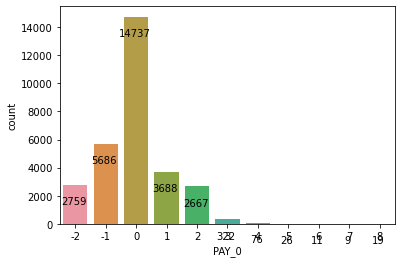

 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64


In [76]:
repaySept = sns.countplot(x='PAY_0', data=credit)
for a in repaySept.patches:
    repaySept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_0'].value_counts(normalize=True)*100)

- 49.12% of credit loan users made payment duly in September 2005
- 18.95% of credit loan users had delayed payment for 2 month in September 2005
- 12.29% of credit loan users had delayed payment for 3 month in September 2005
- 9.20% of credit loan users had delayed payment for 1 month in September 2005
- 8.90% of credit loan users had delayed payment for 4 month in September 2005
- 1.07% of credit loan users had delayed payment for 5 month in September 2005
- 0.25% of credit loan users had delayed payment for 6 month in September 2005
- 0.09% of credit loan users had delayed payment for 7 month in September 2005
- 0.63% of credit loan users had delayed payment for 10 month in September 2005
- 0.04% of credit loan users had delayed payment for 8 month in September 2005
- 0.03% of credit loan users had delayed payment for 9 month in September 2005

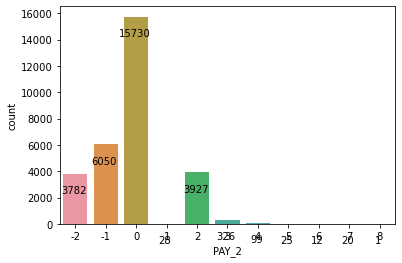

 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64


In [82]:
repayAug = sns.countplot(x='PAY_2', data=credit)
for a in repayAug.patches:
    repayAug.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_2'].value_counts(normalize=True)*100)

- 52.43% of credit loan users made payment duly in August 2005
- 20.17% of credit loan users had delayed payment for 2 month in August 2005
- 13.09% of credit loan users had delayed payment for 4 month in August 2005
- 12.61% of credit loan users had delayed payment for 1 month in August 2005
- 1.09% of credit loan users had delayed payment for 5 month in August 2005
- 0.33% of credit loan users had delayed payment for 6 month in August 2005
- 0.09% of credit loan users had delayed payment for 3 month in August 2005
- 0.08% of credit loan users had delayed payment for 7 month in August 2005
- 0.07% of credit loan users had delayed payment for 9 month in August 2005
- 0.04% of credit loan users had delayed payment for 8 month in August 2005
- 0.00% of credit loan users had delayed payment for 10 month in August 2005

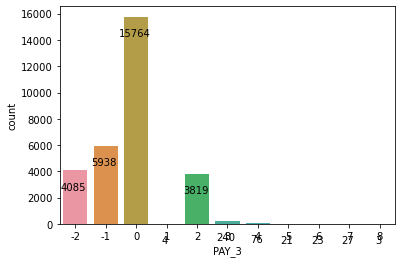

 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64


In [83]:
repayJul = sns.countplot(x='PAY_3', data=credit)
for a in repayJul.patches:
    repayJul.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_3'].value_counts(normalize=True)*100)

- 52.55% of credit loan users made payment duly in July 2005
- 19.79% of credit loan users had delayed payment for 2 month in July 2005
- 13.62% of credit loan users had delayed payment for 1 month in July 2005
- 12.73% of credit loan users had delayed payment for 4 month in July 2005
- 0.80% of credit loan users had delayed payment for 5 month in July 2005
- 0.25% of credit loan users had delayed payment for 6 month in July 2005
- 0.09% of credit loan users had delayed payment for 9 month in July 2005
- 0.08% of credit loan users had delayed payment for 8 month in July 2005
- 0.07% of credit loan users had delayed payment for 7 month in July 2005
- 0.01% of credit loan users had delayed payment for 3 month in July 2005
- 0.01% of credit loan users had delayed payment for 10 month in July 2005

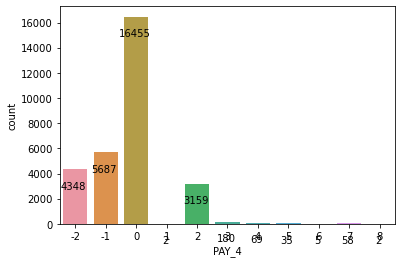

 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1     0.006667
 8     0.006667
Name: PAY_4, dtype: float64


In [85]:
repayJun = sns.countplot(x='PAY_4', data=credit)
for a in repayJun.patches:
    repayJun.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_4'].value_counts(normalize=True)*100)

- 54.85% of credit loan users made payment duly in June 2005
- 18.96% of credit loan users had delayed payment for 2 month in June 2005
- 14.49% of credit loan users had delayed payment for 1 month in June 2005
- 10.53% of credit loan users had delayed payment for 4 month in June 2005
- 0.60% of credit loan users had delayed payment for 5 month in June 2005
- 0.23% of credit loan users had delayed paymenJunet for 6 month in June 2005
- 0.19% of credit loan users had delayed payment for 9 month in June 2005
- 0.12% of credit loan users had delayed payment for 7 month in June 2005
- 0.02% of credit loan users had delayed payment for 8 month in June 2005
- 0.01% of credit loan users had delayed payment for 3 month in June 2005
- 0.01% of credit loan users had delayed payment for 10 month in June 2005

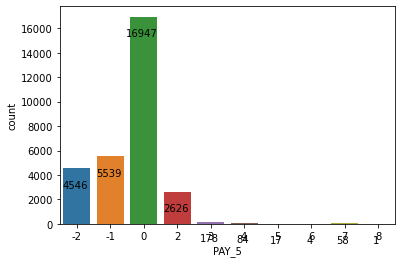

 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: PAY_5, dtype: float64


In [86]:
repayMay = sns.countplot(x='PAY_5', data=credit)
for a in repayMay.patches:
    repayMay.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_5'].value_counts(normalize=True)*100)

- 56.49% of credit loan users made payment duly in May 2005
- 18.46% of credit loan users had delayed payment for 2 month in May 2005
- 15.15% of credit loan users had delayed payment for 1 month in May 2005
- 8.75% of credit loan users had delayed payment for 4 month in May 2005
- 0.59% of credit loan users had delayed payment for 5 month in May 2005
- 0.28% of credit loan users had delayed payment for 6 month in May 2005
- 0.19% of credit loan users had delayed payment for 9 month in May 2005
- 0.06% of credit loan users had delayed payment for 7 month in May 2005
- 0.01% of credit loan users had delayed payment for 8 month in May 2005
- 0.00% of credit loan users had delayed payment for 10 month in May 2005

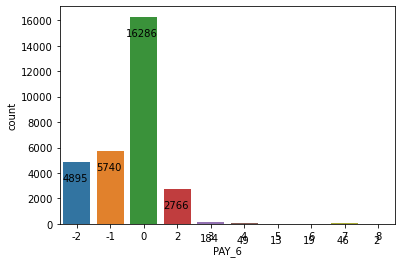

 0    54.286667
-1    19.133333
-2    16.316667
 2     9.220000
 3     0.613333
 4     0.163333
 7     0.153333
 6     0.063333
 5     0.043333
 8     0.006667
Name: PAY_6, dtype: float64


In [87]:
repayApr = sns.countplot(x='PAY_6', data=credit)
for a in repayApr.patches:
    repayApr.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_6'].value_counts(normalize=True)*100)

- 54.29% of credit loan users made payment duly in April 2005
- 19.13% of credit loan users had delayed payment for 2 month in April 2005
- 16.32% of credit loan users had delayed payment for 1 month in April 2005
- 9.22% of credit loan users had delayed payment for 4 month in April 2005
- 0.61% of credit loan users had delayed payment for 5 month in April 2005
- 0.16% of credit loan users had delayed payment for 6 month in April 2005
- 0.15% of credit loan users had delayed payment for 9 month in April 2005
- 0.06% of credit loan users had delayed payment for 8 month in April 2005
- 0.04% of credit loan users had delayed payment for 7 month in April 2005
- 0.01% of credit loan users had delayed payment for 10 month in April 2005

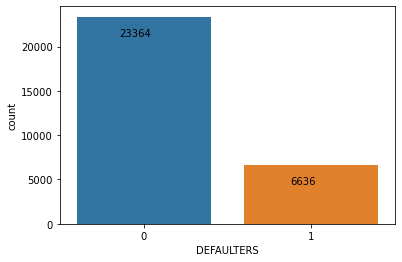

0    77.88
1    22.12
Name: DEFAULTERS, dtype: float64


In [79]:
repaySept = sns.countplot(x='DEFAULTERS', data=credit)
for a in repaySept.patches:
    repaySept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['DEFAULTERS'].value_counts(normalize=True)*100)

- 77.9% of credit loan users do not default on thier payments
- 22.1% of credit loan users default on thier payments

Organising all the 'Bill Statement' and 'Amount of previous payment' features in clusters to make them easy to analyze

In [119]:
# standardizing the data to make it easy to cluster
scaler= StandardScaler()
df = scaler.fit_transform(credit)

In [133]:
cCredit = pd.DataFrame(df)
cCredit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTERS']
cCredit.head()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0 -1.731993  -1.136720  0.810161    0.21187 -1.068797 -1.246020  1.794564  1.782348 -0.696663   
1 -1.731878  -0.365981  0.810161    0.21187  0.849131 -1.029047 -0.874991  1.782348  0.138865   
2 -1.731762  -0.597202  0.810161    0.21187  0.849131 -0.161156  0.014861  0.111736  0.138865   
3 -1.731647  -0.905498  0.810161    0.21187 -1.068797  0.164303  0.014861  0.111736  0.138865   
4 -1.731531  -0.905498 -1.234323    0.21187 -1.068797  2.334029 -0.874991  0.111736 -0.696663   

      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0 -0.666599  ...  -0.672497  -0.663059  -0.652724 -0.341942 -0.227086 -0.296801 -0.308063   
1  0.188746  ...  -0.621636  -0.606229  -0.597966 -0.341942 -0.213588 -0.240005 -0.244230   
2  0.188746  ...  -0.449730  -0.417188  -0.391630 -0.250292 -0.191887 -0.240005 -0.244230   
3  0.188746  ...  -0.232373  -0.186729  -0.156579 -0.221191 -0.169361 -0.228645 -0.237846   
4  0.188746  ...  -0.346997  -0.348137  -0.331482 -0.221191  1.335034  0.271165  0.266434   

   PAY_AMT5  PAY_AMT6  DEFAULTERS  
0 -0.314136 -0.293382    1.876378  
1 -0.314136 -0.180878    1.876378  
2 -0.248683 -0.012122   -0.532942  
3 -0.244166 -0.237130   -0.532942  
4 -0.269039 -0.255187   -0.532942  

[5 rows x 25 columns]

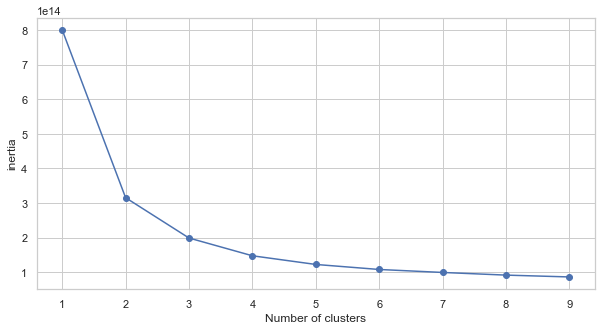

In [121]:
# creating a function to work out the optimum number of clusters

def optKMeans(dat, maxK):
    means = []
    inertias = []
    
    for k in range(1, maxK):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(dat)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    #generating the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

# identifying the cluster that works best for the bill statement columns
optKMeans(credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], 10)

the inertia begins to drop to a more stable region from 3 clusters. lets work with 10 clusters

In [134]:
# applying k means clustering on each feature
kmeans = KMeans(n_clusters=10)
CBILL_AMT1 = kmeans.fit(cCredit[['BILL_AMT1']])

# creating and adding the clustered features to the data
cCredit['CBILL_AMT1'] = CBILL_AMT1.labels_

In [135]:
CBILL_AMT2 = kmeans.fit(cCredit[['BILL_AMT2']])
cCredit['CBILL_AMT2'] = CBILL_AMT2.labels_

In [136]:
CBILL_AMT3 = kmeans.fit(cCredit[['BILL_AMT3']])
cCredit['CBILL_AMT3'] = CBILL_AMT3.labels_

In [137]:
CBILL_AMT4 = kmeans.fit(cCredit[['BILL_AMT4']])
cCredit['CBILL_AMT4'] = CBILL_AMT4.labels_

In [138]:
CBILL_AMT5 = kmeans.fit(cCredit[['BILL_AMT5']])
cCredit['CBILL_AMT5'] = CBILL_AMT5.labels_

In [139]:
CBILL_AMT6 = kmeans.fit(cCredit[['BILL_AMT6']])
cCredit['CBILL_AMT6'] = CBILL_AMT6.labels_

In [140]:
cCredit.head()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0 -1.731993  -1.136720  0.810161    0.21187 -1.068797 -1.246020  1.794564  1.782348 -0.696663   
1 -1.731878  -0.365981  0.810161    0.21187  0.849131 -1.029047 -0.874991  1.782348  0.138865   
2 -1.731762  -0.597202  0.810161    0.21187  0.849131 -0.161156  0.014861  0.111736  0.138865   
3 -1.731647  -0.905498  0.810161    0.21187 -1.068797  0.164303  0.014861  0.111736  0.138865   
4 -1.731531  -0.905498 -1.234323    0.21187 -1.068797  2.334029 -0.874991  0.111736 -0.696663   

      PAY_4  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULTERS  CBILL_AMT1  CBILL_AMT2  CBILL_AMT3  \
0 -0.666599  ... -0.308063 -0.314136 -0.293382    1.876378           4           2           2   
1  0.188746  ... -0.244230 -0.314136 -0.180878    1.876378           4           2           2   
2  0.188746  ... -0.244230 -0.248683 -0.012122   -0.532942           0           6           8   
3  0.188746  ... -0.237846 -0.244166 -0.237130   -0.532942           9           0           0   
4  0.188746  ...  0.266434 -0.269039 -0.255187   -0.532942           4           2           8   

   CBILL_AMT4  CBILL_AMT5  CBILL_AMT6  
0           0           2           0  
1           0           2           0  
2           6           6           7  
3           6           6           7  
4           6           6           7  

[5 rows x 31 columns]

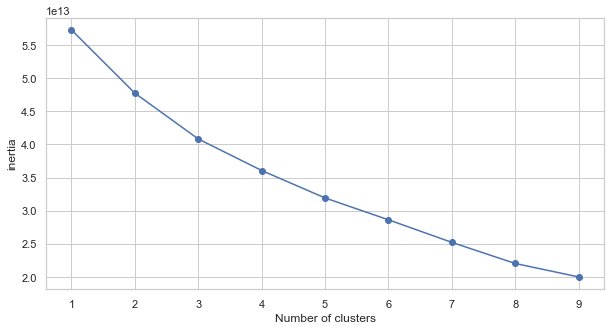

In [141]:
# identifying the cluster that works best for the amount of previous statement columns
optKMeans(credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], 10)

best to work with 10 clusters

In [142]:
kmeans = KMeans(n_clusters=10)
CPAY_AMT1 = kmeans.fit(cCredit[['PAY_AMT1']])
cCredit['CPAY_AMT1'] = CPAY_AMT1.labels_

In [143]:
CPAY_AMT2 = kmeans.fit(cCredit[['PAY_AMT2']])
cCredit['CPAY_AMT2'] = CPAY_AMT2.labels_

In [144]:
CPAY_AMT3 = kmeans.fit(cCredit[['PAY_AMT3']])
cCredit['CPAY_AMT3'] = CPAY_AMT3.labels_

In [145]:
CPAY_AMT4 = kmeans.fit(cCredit[['PAY_AMT4']])
cCredit['CPAY_AMT4'] = CPAY_AMT4.labels_

In [146]:
CPAY_AMT5 = kmeans.fit(cCredit[['PAY_AMT5']])
cCredit['CPAY_AMT5'] = CPAY_AMT5.labels_

In [147]:
CPAY_AMT6 = kmeans.fit(cCredit[['PAY_AMT6']])
cCredit['CPAY_AMT6'] = CPAY_AMT6.labels_

In [148]:
cCredit.head()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0 -1.731993  -1.136720  0.810161    0.21187 -1.068797 -1.246020  1.794564  1.782348 -0.696663   
1 -1.731878  -0.365981  0.810161    0.21187  0.849131 -1.029047 -0.874991  1.782348  0.138865   
2 -1.731762  -0.597202  0.810161    0.21187  0.849131 -0.161156  0.014861  0.111736  0.138865   
3 -1.731647  -0.905498  0.810161    0.21187 -1.068797  0.164303  0.014861  0.111736  0.138865   
4 -1.731531  -0.905498 -1.234323    0.21187 -1.068797  2.334029 -0.874991  0.111736 -0.696663   

      PAY_4  ...  CBILL_AMT3  CBILL_AMT4  CBILL_AMT5  CBILL_AMT6  CPAY_AMT1  CPAY_AMT2  CPAY_AMT3  \
0 -0.666599  ...           2           0           2           0          0          0          7   
1  0.188746  ...           2           0           2           0          0          0          7   
2  0.188746  ...           8           6           6           7          0          0          7   
3  0.188746  ...           0           6           6           7          0          0          7   
4  0.188746  ...           8           6           6           7          0          6          0   

   CPAY_AMT4  CPAY_AMT5  CPAY_AMT6  
0          7          9          0  
1          7          9          0  
2          7          9          9  
3          7          9          0  
4          6          9          0  

[5 rows x 37 columns]

In [149]:
# taking all the clustered features back to the data that was not standardized

credit['CBILL_AMT1'] = cCredit['CBILL_AMT1']
credit['CBILL_AMT2'] = cCredit['CBILL_AMT2']
credit['CBILL_AMT3'] = cCredit['CBILL_AMT3']
credit['CBILL_AMT4'] = cCredit['CBILL_AMT4']
credit['CBILL_AMT5'] = cCredit['CBILL_AMT5']
credit['CBILL_AMT6'] = cCredit['CBILL_AMT6']
credit['CPAY_AMT1'] = cCredit['CPAY_AMT1']
credit['CPAY_AMT2'] = cCredit['CPAY_AMT2']
credit['CPAY_AMT3'] = cCredit['CPAY_AMT3']
credit['CPAY_AMT4'] = cCredit['CPAY_AMT4']
credit['CPAY_AMT5'] = cCredit['CPAY_AMT5']
credit['CPAY_AMT6'] = cCredit['CPAY_AMT6']

credit

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  ...  \
0          1      20000    2          2         1   24      2      2     -1     -1  ...   
1          2     120000    2          2         2   26     -1      2      0      0  ...   
2          3      90000    2          2         2   34      0      0      0      0  ...   
3          4      50000    2          2         1   37      0      0      0      0  ...   
4          5      50000    1          2         1   57     -1      0     -1      0  ...   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...    ...  ...   
29995  29996     220000    1          3         1   39      0      0      0      0  ...   
29996  29997     150000    1          3         2   43     -1     -1     -1     -1  ...   
29997  29998      30000    1          2         2   37      4      3      2     -1  ...   
29998  29999      80000    1          3         1   41      1     -1      0      0  ...   
29999  30000      50000    1          2         1   46      0      0      0      0  ...   

       CBILL_AMT3  CBILL_AMT4  CBILL_AMT5  CBILL_AMT6  CPAY_AMT1  CPAY_AMT2  CPAY_AMT3  CPAY_AMT4  \
0               2           0           2           0          0          0          7          7   
1               2           0           2           0          0          0          7          7   
2               8           6           6           7          0          0          7          7   
3               0           6           6           7          0          0          7          7   
4               8           6           6           7          0          6          0          6   
...           ...         ...         ...         ...        ...        ...        ...        ...   
29995           5           8           6           7          5          4          0          0   
29996           2           0           2           0          0          0          0          7   
29997           2           6           6           7          0          0          5          0   
29998           9           2           2           3          8          0          7          7   
29999           0           2           6           7          0          0          7          7   

       CPAY_AMT5  CPAY_AMT6  
0              9          0  
1              9          0  
2              9          9  
3              9          0  
4              9          0  
...          ...        ...  
29995          0          0  
29996          9          0  
29997          9          9  
29998          2          0  
29999          9          0  

[30000 rows x 37 columns]

In [150]:
credit.describe().T

count           mean            std       min       25%       50%        75%  \
ID          30000.0   15000.500000    8660.398374       1.0   7500.75   15000.5   22500.25   
LIMIT_BAL   30000.0  167484.322667  129747.661567   10000.0  50000.00  140000.0  240000.00   
SEX         30000.0       1.603733       0.489129       1.0      1.00       2.0       2.00   
EDUCATION   30000.0       1.853133       0.790349       0.0      1.00       2.0       2.00   
MARRIAGE    30000.0       1.551867       0.521970       0.0      1.00       2.0       2.00   
AGE         30000.0      35.485500       9.217904      21.0     28.00      34.0      41.00   
PAY_0       30000.0      -0.016700       1.123802      -2.0     -1.00       0.0       0.00   
PAY_2       30000.0      -0.133767       1.197186      -2.0     -1.00       0.0       0.00   
PAY_3       30000.0      -0.166200       1.196868      -2.0     -1.00       0.0       0.00   
PAY_4       30000.0      -0.220667       1.169139      -2.0     -1.00       0.0       0.00   
PAY_5       30000.0      -0.266200       1.133187      -2.0     -1.00       0.0       0.00   
PAY_6       30000.0      -0.291100       1.149988      -2.0     -1.00       0.0       0.00   
BILL_AMT1   30000.0   51223.330900   73635.860576 -165580.0   3558.75   22381.5   67091.00   
BILL_AMT2   30000.0   49179.075167   71173.768783  -69777.0   2984.75   21200.0   64006.25   
BILL_AMT3   30000.0   47013.154800   69349.387427 -157264.0   2666.25   20088.5   60164.75   
BILL_AMT4   30000.0   43262.948967   64332.856134 -170000.0   2326.75   19052.0   54506.00   
BILL_AMT5   30000.0   40311.400967   60797.155770  -81334.0   1763.00   18104.5   50190.50   
BILL_AMT6   30000.0   38871.760400   59554.107537 -339603.0   1256.00   17071.0   49198.25   
PAY_AMT1    30000.0    5663.580500   16563.280354       0.0   1000.00    2100.0    5006.00   
PAY_AMT2    30000.0    5921.163500   23040.870402       0.0    833.00    2009.0    5000.00   
PAY_AMT3    30000.0    5225.681500   17606.961470       0.0    390.00    1800.0    4505.00   
PAY_AMT4    30000.0    4826.076867   15666.159744       0.0    296.00    1500.0    4013.25   
PAY_AMT5    30000.0    4799.387633   15278.305679       0.0    252.50    1500.0    4031.50   
PAY_AMT6    30000.0    5215.502567   17777.465775       0.0    117.75    1500.0    4000.00   
DEFAULTERS  30000.0       0.221200       0.415062       0.0      0.00       0.0       0.00   
CBILL_AMT1  30000.0       4.213867       2.964673       0.0      3.00       4.0       7.00   
CBILL_AMT2  30000.0       3.240400       2.429336       0.0      2.00       2.0       6.00   
CBILL_AMT3  30000.0       3.920100       3.162907       0.0      2.00       2.0       8.00   
CBILL_AMT4  30000.0       2.839533       2.949261       0.0      0.00       2.0       6.00   
CBILL_AMT5  30000.0       3.606133       2.640890       0.0      2.00       2.0       6.00   
CBILL_AMT6  30000.0       2.945033       3.178241       0.0      0.00       1.0       7.00   
CPAY_AMT1   30000.0       1.516733       2.406224       0.0      0.00       0.0       4.00   
CPAY_AMT2   30000.0       1.759900       2.921781       0.0      0.00       0.0       4.00   
CPAY_AMT3   30000.0       5.402067       2.864533       0.0      5.00       7.0       7.00   
CPAY_AMT4   30000.0       5.173467       2.975109       0.0      4.00       7.0       7.00   
CPAY_AMT5   30000.0       6.305067       3.849618       0.0      2.00       9.0       9.00   
CPAY_AMT6   30000.0       2.796833       3.898307       0.0      0.00       0.0       6.00   

                  max  
ID            30000.0  
LIMIT_BAL   1000000.0  
SEX               2.0  
EDUCATION         6.0  
MARRIAGE          3.0  
AGE              79.0  
PAY_0             8.0  
PAY_2             8.0  
PAY_3             8.0  
PAY_4             8.0  
PAY_5             8.0  
PAY_6             8.0  
BILL_AMT1    964511.0  
BILL_AMT2    983931.0  
BILL_AMT3   1664089.0  
BILL_AMT4    891586.0  
BILL_AMT5    927171.0  
BILL_AMT6

In [201]:
# to see the values in each cluster

def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

ClusterIndicesNumpy(6, CBILL_AMT1.labels_)

array([   57,    90,   108, ..., 29965, 29972, 29977], dtype=int64)

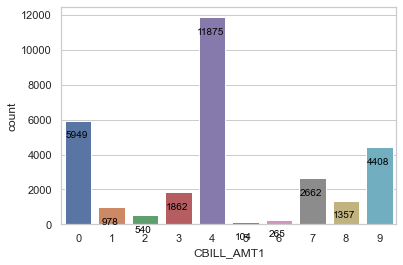

4    39.583333
0    19.830000
9    14.693333
7     8.873333
3     6.206667
8     4.523333
1     3.260000
2     1.800000
6     0.883333
5     0.346667
Name: CBILL_AMT1, dtype: float64


In [185]:
bSept = sns.countplot(x='CBILL_AMT1', data=credit)
for a in bSept.patches:
    bSept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT1'].value_counts(normalize=True)*100)

- 39.58% of credit loan users fall under cluster 4 for amount of bill statement in September 2005
- 19.83% of credit loan users fall under cluster 0 for amount of bill statement in September 2005
- 14.69% of credit loan users fall under cluster 9 for amount of bill statement in September 2005
- 8.87% of credit loan users fall under cluster 7 for amount of bill statement in September 2005
- 6.21% of credit loan users fall under cluster 3 for amount of bill statement in September 2005
- 4.52% of credit loan users fall under cluster 8 for amount of bill statement in September 2005
- 3.26% of credit loan users fall under cluster 1 for amount of bill statement in September 2005
- 3.80% of credit loan users fall under cluster 2 for amount of bill statement in September 2005
- 0.88% of credit loan users fall under cluster 6 for amount of bill statement in September 2005
- 0.35% of credit loan users fall under cluster 5 for amount of bill statement in September 2005

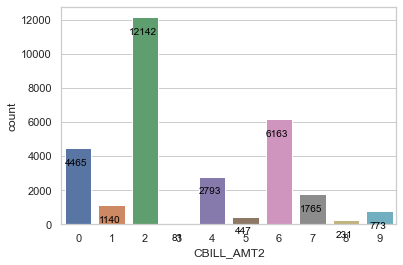

2    40.473333
6    20.543333
0    14.883333
4     9.310000
7     5.883333
1     3.800000
9     2.576667
5     1.490000
8     0.770000
3     0.270000
Name: CBILL_AMT2, dtype: float64


In [271]:
bAug = sns.countplot(x='CBILL_AMT2', data=credit)
for a in bAug.patches:
    bAug.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT2'].value_counts(normalize=True)*100)

- 40.47% of credit loan users fall under cluster 2 for amount of bill statement in August 2005
- 20.54% of credit loan users fall under cluster 6 for amount of bill statement in August 2005
- 14.88% of credit loan users fall under cluster 0 for amount of bill statement in August 2005
- 9.31% of credit loan users fall under cluster 4 for amount of bill statement in August 2005
- 5.88% of credit loan users fall under cluster 7 for amount of bill statement in August 2005
- 3.80% of credit loan users fall under cluster 1 for amount of bill statement in August 2005
- 2.57% of credit loan users fall under cluster 9 for amount of bill statement in August 2005
- 1.49% of credit loan users fall under cluster 5 for amount of bill statement in August 2005
- 0.77% of credit loan users fall under cluster 8 for amount of bill statement in August 2005
- 0.27% of credit loan users fall under cluster 3 for amount of bill statement in August 2005

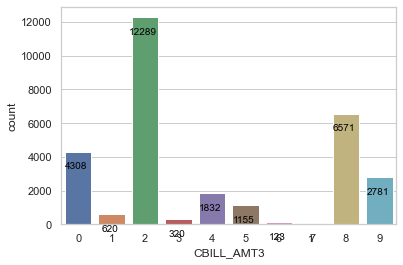

2    40.963333
8    21.903333
0    14.360000
9     9.270000
4     6.106667
5     3.850000
1     2.066667
3     1.066667
6     0.410000
7     0.003333
Name: CBILL_AMT3, dtype: float64


In [187]:
bJul = sns.countplot(x='CBILL_AMT3', data=credit)
for a in bJul.patches:
    bJul.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT3'].value_counts(normalize=True)*100)

- 40.96% of credit loan users fall under cluster 2 for amount of bill statement in July 2005
- 21.90% of credit loan users fall under cluster 8 for amount of bill statement in July 2005
- 14.36% of credit loan users fall under cluster 0 for amount of bill statement in July 2005
- 9.27% of credit loan users fall under cluster 9 for amount of bill statement in July 2005
- 6.10% of credit loan users fall under cluster 4 for amount of bill statement in July 2005
- 3.85% of credit loan users fall under cluster 5 for amount of bill statement in July 2005
- 2.07% of credit loan users fall under cluster 1 for amount of bill statement in July 2005
- 1.07% of credit loan users fall under cluster 3 for amount of bill statement in July 2005
- 0.41% of credit loan users fall under cluster 6 for amount of bill statement in July 2005
- 0.00% of credit loan users fall under cluster 7 for amount of bill statement in July 2005

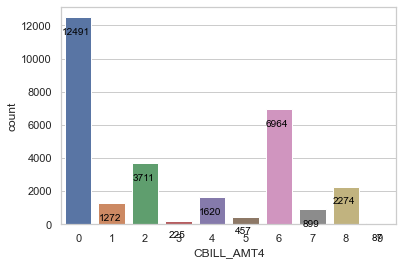

0    41.636667
6    23.213333
2    12.370000
8     7.580000
4     5.400000
1     4.240000
7     2.996667
5     1.523333
3     0.750000
9     0.290000
Name: CBILL_AMT4, dtype: float64


In [189]:
bJun = sns.countplot(x='CBILL_AMT4', data=credit)
for a in bJun.patches:
    bJun.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT4'].value_counts(normalize=True)*100)

- 41.64% of credit loan users fall under cluster 0 for amount of bill statement in June 2005
- 23.21% of credit loan users fall under cluster 6 for amount of bill statement in June 2005
- 12.37% of credit loan users fall under cluster 2 for amount of bill statement in June 2005
- 7.58% of credit loan users fall under cluster 8 for amount of bill statement in June 2005
- 5.40% of credit loan users fall under cluster 4 for amount of bill statement in June 2005
- 4.24% of credit loan users fall under cluster 1 for amount of bill statement in June 2005
- 3.00% of credit loan users fall under cluster 7 for amount of bill statement in June 2005
- 1.52% of credit loan users fall under cluster 5 for amount of bill statement in June 2005
- 0.75% of credit loan users fall under cluster 3 for amount of bill statement in June 2005
- 0.29% of credit loan users fall under cluster 9 for amount of bill statement in June 2005

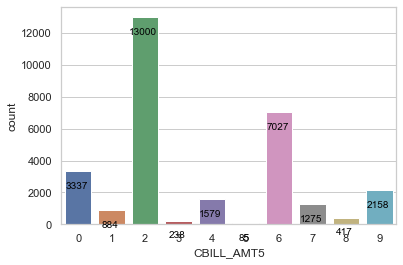

2    43.333333
6    23.423333
0    11.123333
9     7.193333
4     5.263333
7     4.250000
1     2.946667
8     1.390000
3     0.793333
5     0.283333
Name: CBILL_AMT5, dtype: float64


In [190]:
bMay = sns.countplot(x='CBILL_AMT5', data=credit)
for a in bMay.patches:
    bMay.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT5'].value_counts(normalize=True)*100)

- 43.33% of credit loan users fall under cluster 2 for amount of bill statement in May 2005
- 23.42% of credit loan users fall under cluster 6 for amount of bill statement in May 2005
- 11.12% of credit loan users fall under cluster 0 for amount of bill statement in May 2005
- 7.19% of credit loan users fall under cluster 9 for amount of bill statement in May 2005
- 5.26% of credit loan users fall under cluster 4 for amount of bill statement in May 2005
- 4.25% of credit loan users fall under cluster 7 for amount of bill statement in May 2005
- 4.25% of credit loan users fall under cluster 1 for amount of bill statement in May 2005
- 1.39% of credit loan users fall under cluster 8 for amount of bill statement in May 2005
- 0.79% of credit loan users fall under cluster 3 for amount of bill statement in May 2005
- 0.28% of credit loan users fall under cluster 5 for amount of bill statement in May 2005

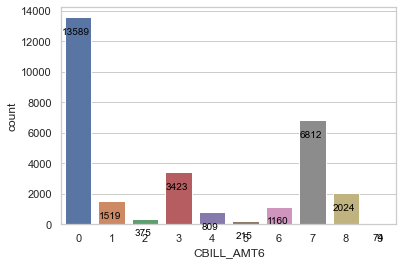

0    45.296667
7    22.706667
3    11.410000
8     6.746667
1     5.063333
6     3.866667
4     2.696667
2     1.250000
5     0.716667
9     0.246667
Name: CBILL_AMT6, dtype: float64


In [191]:
bApr = sns.countplot(x='CBILL_AMT6', data=credit)
for a in bApr.patches:
    bApr.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CBILL_AMT6'].value_counts(normalize=True)*100)

- 45.30% of credit loan users fall under cluster 2 for amount of bill statement in April 2005
- 22.71% of credit loan users fall under cluster 8 for amount of bill statement in April 2005
- 11.41% of credit loan users fall under cluster 0 for amount of bill statement in April 2005
- 6.74% of credit loan users fall under cluster 9 for amount of bill statement in April 2005
- 5.06% of credit loan users fall under cluster 4 for amount of bill statement in April 2005
- 3.87% of credit loan users fall under cluster 5 for amount of bill statement in April 2005
- 2.70% of credit loan users fall under cluster 1 for amount of bill statement in April 2005
- 1.25% of credit loan users fall under cluster 3 for amount of bill statement in April 2005
- 0.71% of credit loan users fall under cluster 6 for amount of bill statement in April 2005
- 0.25% of credit loan users fall under cluster 7 for amount of bill statement in April 2005

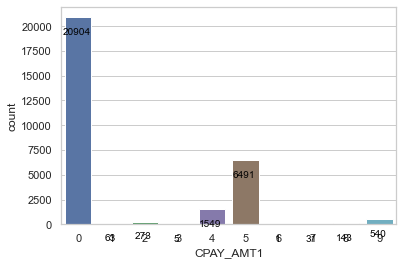

0    69.680000
5    21.636667
4     5.163333
9     1.800000
2     0.910000
8     0.476667
1     0.210000
7     0.103333
3     0.016667
6     0.003333
Name: CPAY_AMT1, dtype: float64


In [193]:
pSept = sns.countplot(x='CPAY_AMT1', data=credit)
for a in pSept.patches:
    pSept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT1'].value_counts(normalize=True)*100)

- 69.68% of credit loan users fall under cluster 0 for amount of previous statement in September 2005
- 21.64% of credit loan users fall under cluster 5 for amount of previous statement in September 2005
- 5.16% of credit loan users fall under cluster 4 for amount of previous statement in September 2005
- 1.80% of credit loan users fall under cluster 9 for amount of previous statement in September 2005
- 0.91% of credit loan users fall under cluster 2 for amount of previous statement in September 2005
- 0.48% of credit loan users fall under cluster 8 for amount of previous statement in September 2005
- 0.21% of credit loan users fall under cluster 1 for amount of previous statement in September 2005
- 0.10% of credit loan users fall under cluster 7 for amount of previous statement in September 2005
- 0.02% of credit loan users fall under cluster 3 for amount of previous statement in September 2005
- 0.00% of credit loan users fall under cluster 6 for amount of previous statement in September 2005

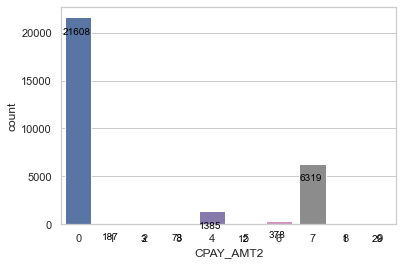

0    72.026667
7    21.063333
4     4.616667
6     1.260000
1     0.623333
3     0.260000
9     0.096667
5     0.040000
2     0.010000
8     0.003333
Name: CPAY_AMT2, dtype: float64


In [194]:
pAug = sns.countplot(x='CPAY_AMT2', data=credit)
for a in pAug.patches:
    pAug.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT2'].value_counts(normalize=True)*100)

- 72.03% of credit loan users fall under cluster 0 for amount of previous statement in August 2005
- 21.06% of credit loan users fall under cluster 7 for amount of previous statement in August 2005
- 4.62% of credit loan users fall under cluster 4 for amount of previous statement in August 2005
- 1.26% of credit loan users fall under cluster 6 for amount of previous statement in August 2005
- 0.62% of credit loan users fall under cluster 1 for amount of previous statement in August 2005
- 0.26% of credit loan users fall under cluster 3 for amount of previous statement in August 2005
- 0.10% of credit loan users fall under cluster 9 for amount of previous statement in August 2005
- 0.04% of credit loan users fall under cluster 5 for amount of previous statement in August 2005
- 0.01% of credit loan users fall under cluster 2 for amount of previous statement in August 2005
- 0.00% of credit loan users fall under cluster 8 for amount of previous statement in August 2005

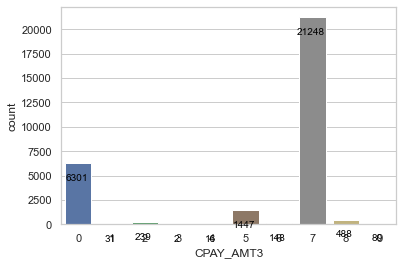

7    70.826667
0    21.003333
5     4.823333
8     1.626667
2     0.796667
6     0.493333
9     0.266667
1     0.103333
4     0.053333
3     0.006667
Name: CPAY_AMT3, dtype: float64


In [195]:
pJul = sns.countplot(x='CPAY_AMT3', data=credit)
for a in pJul.patches:
    pJul.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT3'].value_counts(normalize=True)*100)

- 70.83% of credit loan users fall under cluster 7 for amount of previous statement in July 2005
- 21.00% of credit loan users fall under cluster 0 for amount of previous statement in July 2005
- 4.82% of credit loan users fall under cluster 5 for amount of previous statement in July 2005
- 1.62% of credit loan users fall under cluster 8 for amount of previous statement in July 2005
- 0.80% of credit loan users fall under cluster 2 for amount of previous statement in July 2005
- 0.49% of credit loan users fall under cluster 6 for amount of previous statement in July 2005
- 0.27% of credit loan users fall under cluster 9 for amount of previous statement in July 2005
- 0.10% of credit loan users fall under cluster 5 for amount of previous statement in July 2005
- 0.05% of credit loan users fall under cluster 1 for amount of previous statement in July 2005
- 0.01% of credit loan users fall under cluster 4 for amount of previous statement in July 2005

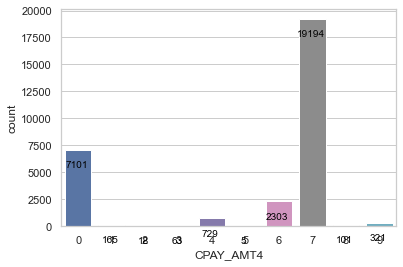

7    63.980000
0    23.670000
6     7.676667
4     2.430000
9     1.070000
1     0.550000
8     0.336667
3     0.210000
2     0.060000
5     0.016667
Name: CPAY_AMT4, dtype: float64


In [196]:
pJun = sns.countplot(x='CPAY_AMT4', data=credit)
for a in pJun.patches:
    pJun.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT4'].value_counts(normalize=True)*100)

- 63.98% of credit loan users fall under cluster 7 for amount of previous statement in June 2005
- 23.67% of credit loan users fall under cluster 0 for amount of previous statement in June 2005
- 7.68% of credit loan users fall under cluster 6 for amount of previous statement in June 2005
- 2.43% of credit loan users fall under cluster 4 for amount of previous statement in June 2005
- 1.07% of credit loan users fall under cluster 9 for amount of previous statement in June 2005
- 0.55% of credit loan users fall under cluster 1 for amount of previous statement in June 2005
- 0.34% of credit loan users fall under cluster 8 for amount of previous statement in June 2005
- 0.21% of credit loan users fall under cluster 3 for amount of previous statement in June 2005
- 0.06% of credit loan users fall under cluster 2 for amount of previous statement in June 2005
- 0.02% of credit loan users fall under cluster 5 for amount of previous statement in June 2005

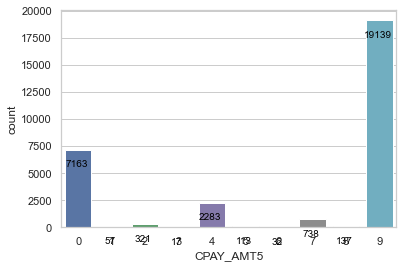

9    63.796667
0    23.876667
4     7.610000
7     2.460000
2     1.070000
8     0.456667
5     0.376667
1     0.190000
6     0.106667
3     0.056667
Name: CPAY_AMT5, dtype: float64


In [197]:
pMay = sns.countplot(x='CPAY_AMT5', data=credit)
for a in pMay.patches:
    pMay.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT5'].value_counts(normalize=True)*100)

- 63.80% of credit loan users fall under cluster 9 for amount of previous statement in May 2005
- 23.88% of credit loan users fall under cluster 0 for amount of previous statement in May 2005
- 7.61% of credit loan users fall under cluster 4 for amount of previous statement in May 2005
- 2.46% of credit loan users fall under cluster 7 for amount of previous statement in May 2005
- 1.07% of credit loan users fall under cluster 2 for amount of previous statement in May 2005
- 0.46% of credit loan users fall under cluster 8 for amount of previous statement in May 2005
- 0.38% of credit loan users fall under cluster 5 for amount of previous statement in May 2005
- 0.19% of credit loan users fall under cluster 1 for amount of previous statement in May 2005
- 0.11% of credit loan users fall under cluster 6 for amount of previous statement in May 2005
- 0.06% of credit loan users fall under cluster 3 for amount of previous statement in May 2005

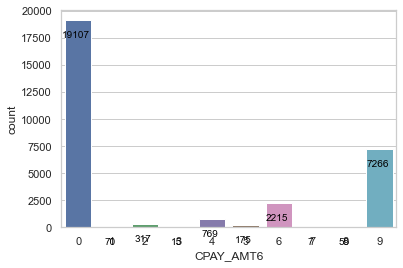

0    63.690000
9    24.220000
6     7.383333
4     2.563333
2     1.056667
5     0.583333
1     0.233333
8     0.196667
3     0.050000
7     0.023333
Name: CPAY_AMT6, dtype: float64


In [198]:
pApr = sns.countplot(x='CPAY_AMT6', data=credit)
for a in pApr.patches:
    pApr.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['CPAY_AMT6'].value_counts(normalize=True)*100)

- 63.69% of credit loan users fall under cluster 0 for amount of previous statement in April 2005
- 24.22% of credit loan users fall under cluster 9 for amount of previous statement in April 2005
- 7.38% of credit loan users fall under cluster 6 for amount of previous statement in April 2005
- 2.56% of credit loan users fall under cluster 4 for amount of previous statement in April 2005
- 1.03% of credit loan users fall under cluster 2 for amount of previous statement in April 2005
- 0.58% of credit loan users fall under cluster 5 for amount of previous statement in April 2005
- 0.23% of credit loan users fall under cluster 1 for amount of previous statement in April 2005
- 0.19% of credit loan users fall under cluster 8 for amount of previous statement in April 2005
- 0.05% of credit loan users fall under cluster 3 for amount of previous statement in April 2005
- 0.02% of credit loan users fall under cluster 7 for amount of previous statement in April 2005

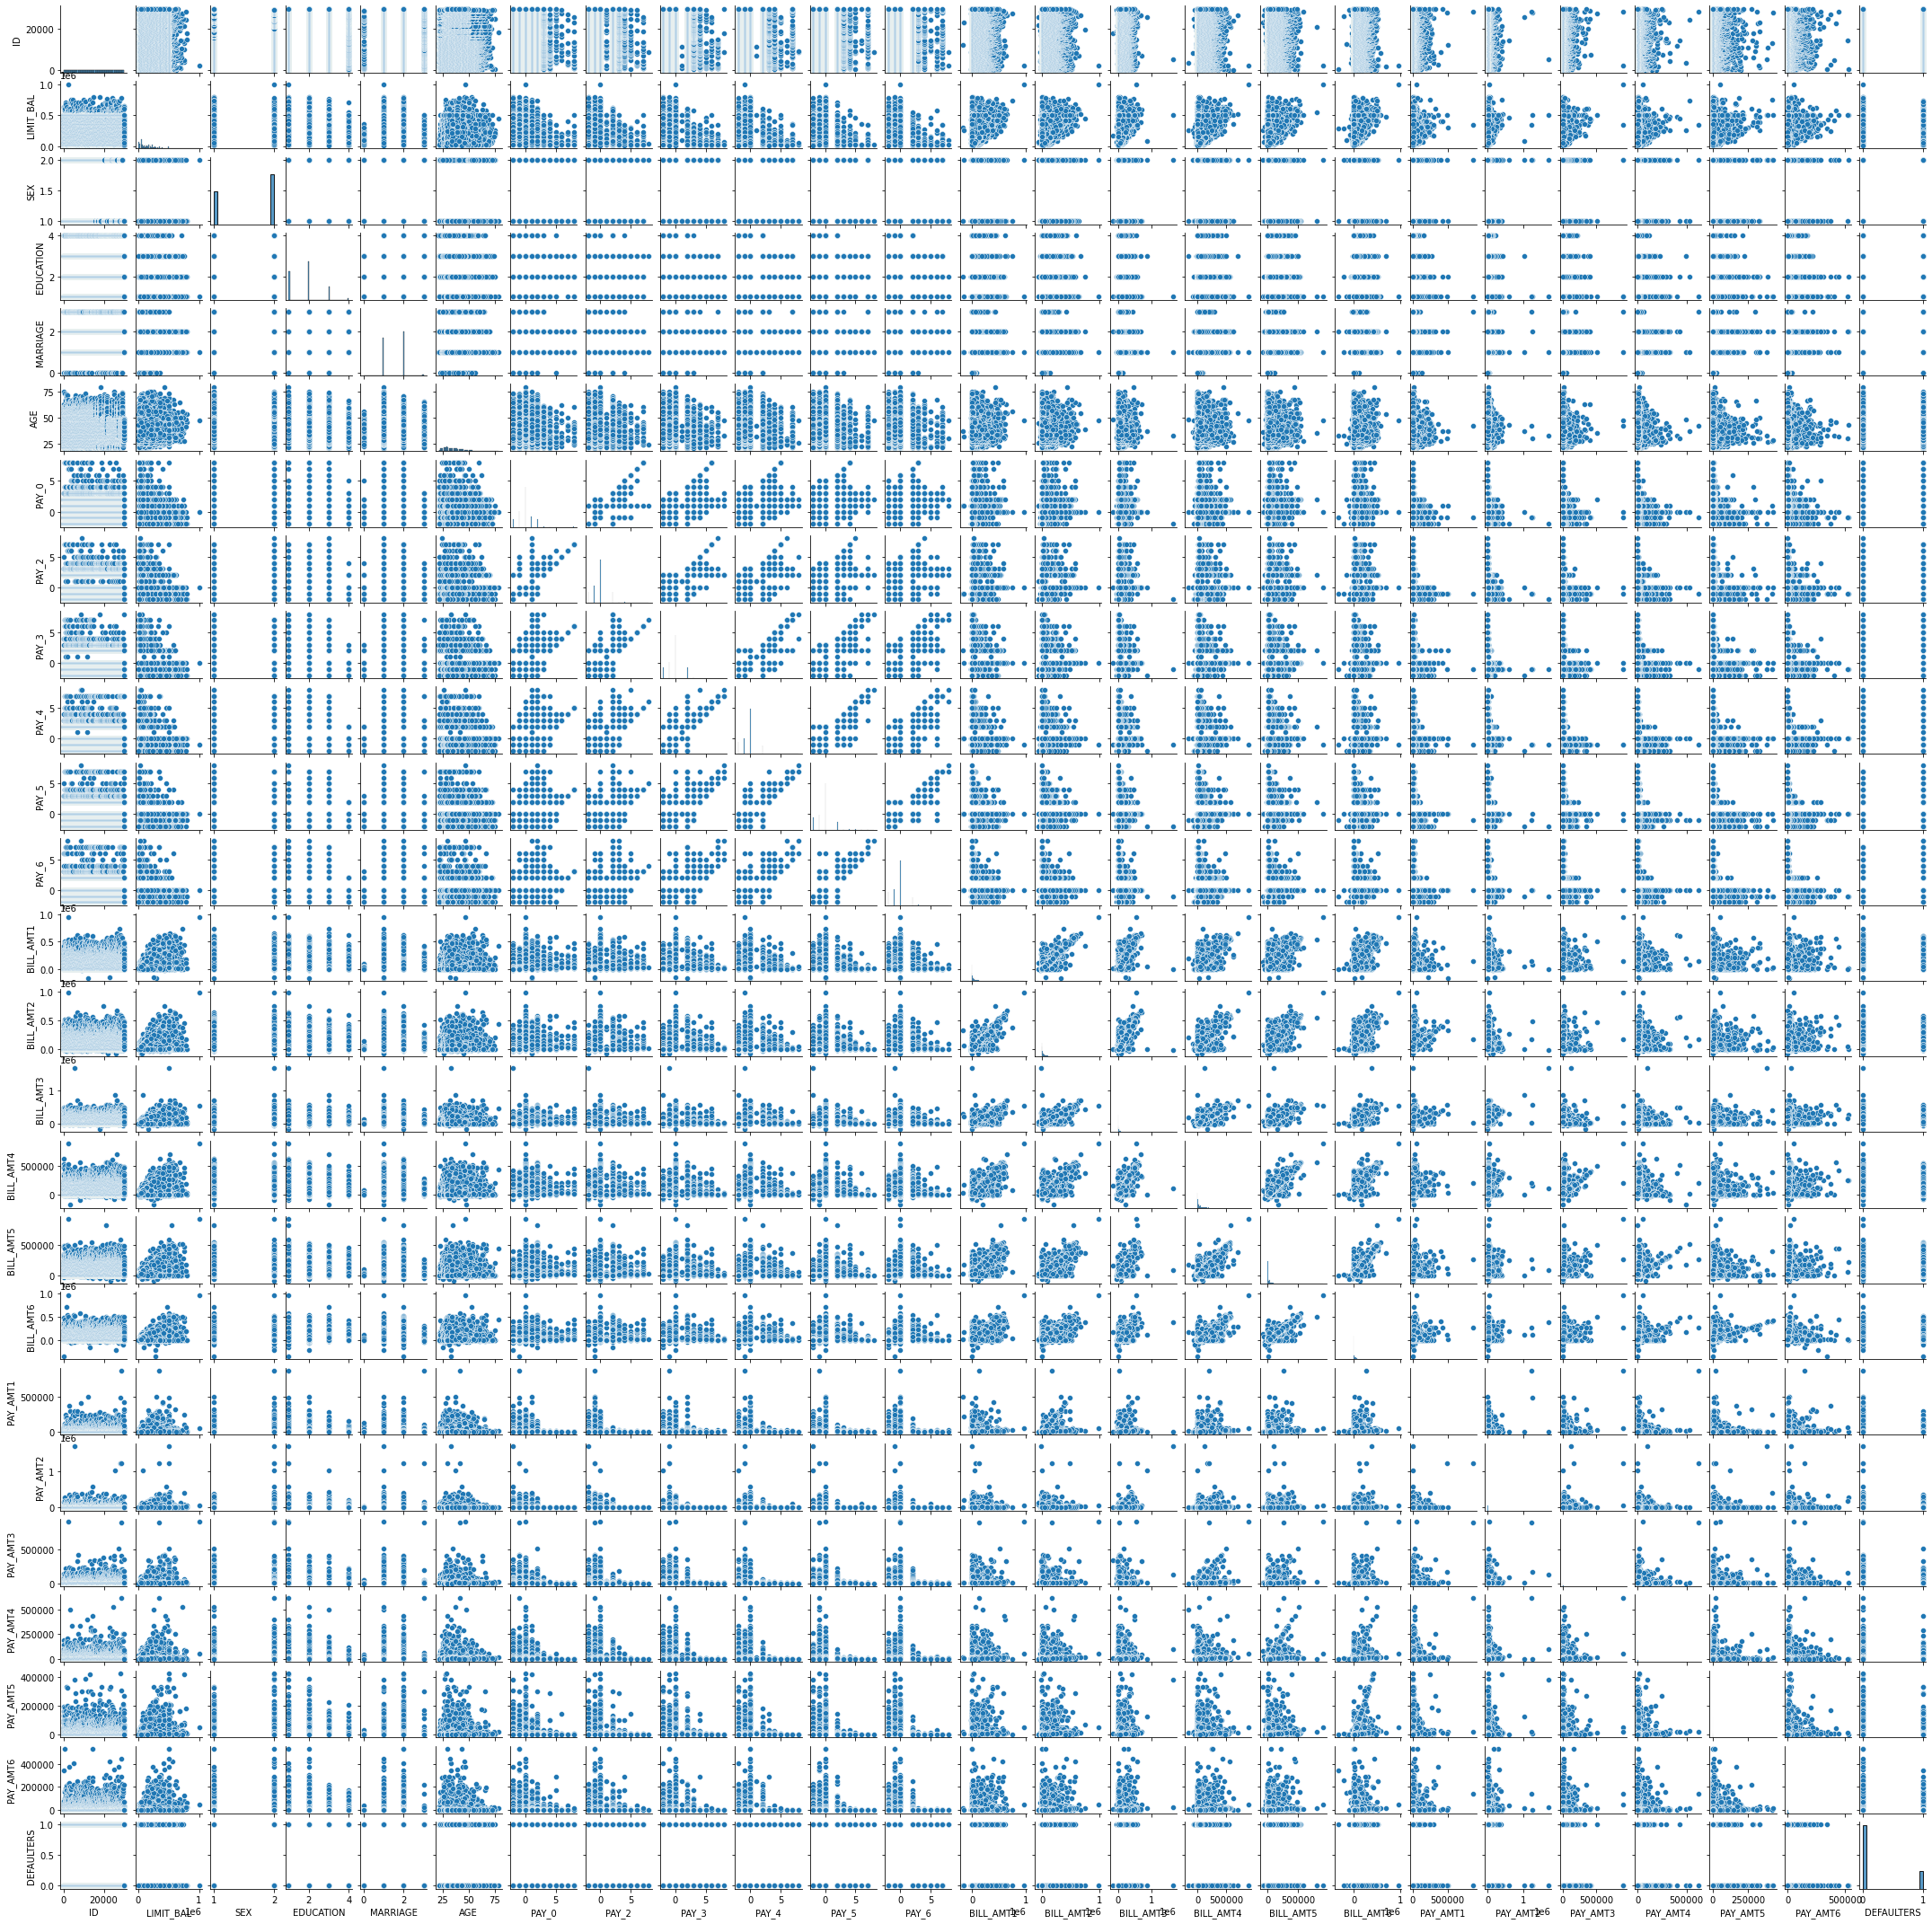

In [60]:
sns.pairplot(credit)
plt.gcf().set_size_inches(30,30)

<AxesSubplot:>

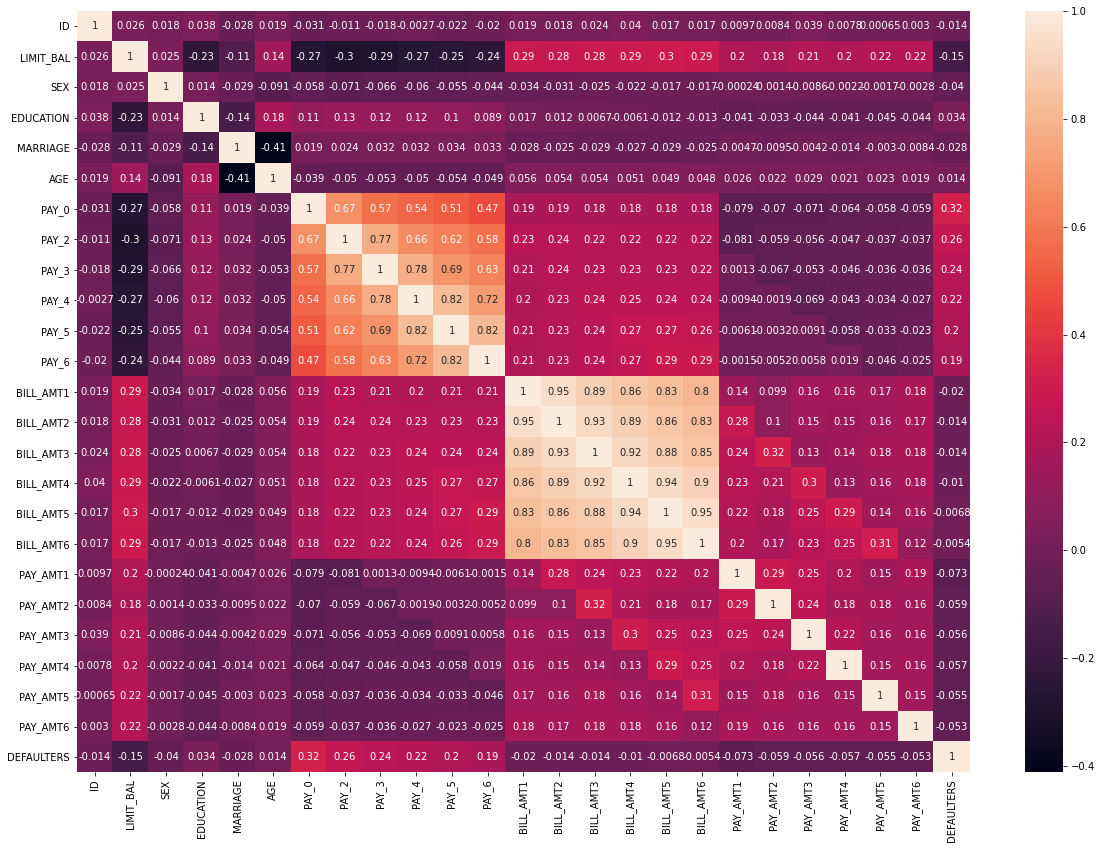

In [93]:
set_option('display.width', 100)
plt.figure(figsize=(20,14))
sns.heatmap(credit.corr(), annot=True)

# Analysing the pairs that have  strong correlations/relationships

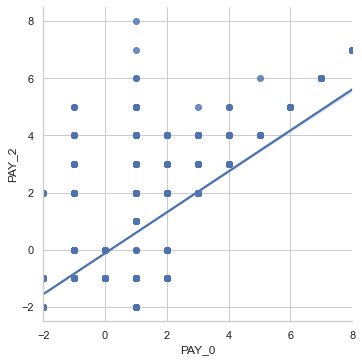

In [101]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_2" , data=credit)

This means that almost all who delayed payment for a specific amount of month(s) in August 2005 also delayed payment in September 2005

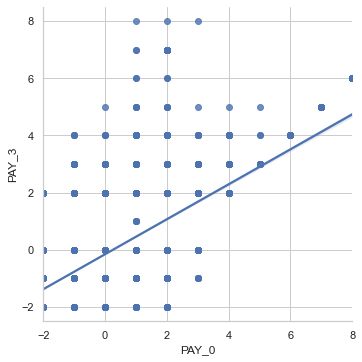

In [102]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_3" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in July 2005 also delayed payment in September 2005

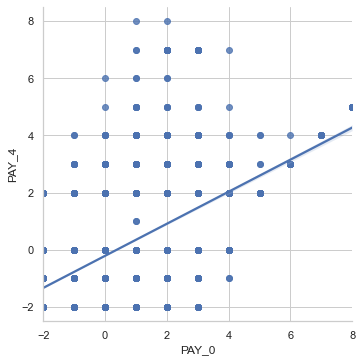

In [103]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in September 2005

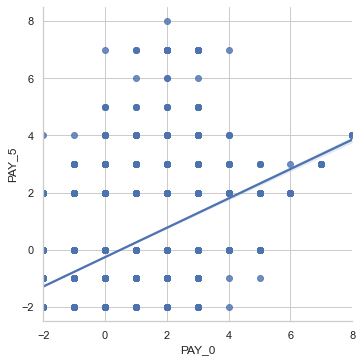

In [202]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_5" , data=credit)

This means that a considerable amount of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in September 2005

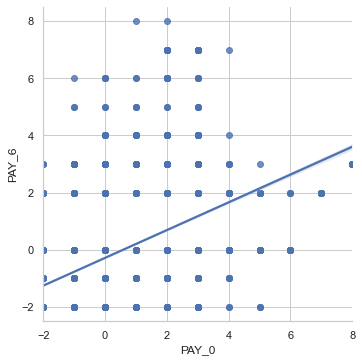

In [270]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_6" , data=credit)

This means that a considerable amount of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in September 2005

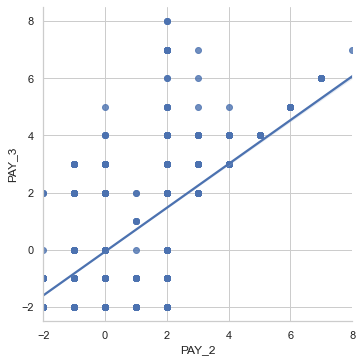

In [205]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_3" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in July 2005 also delayed payment in August 2005

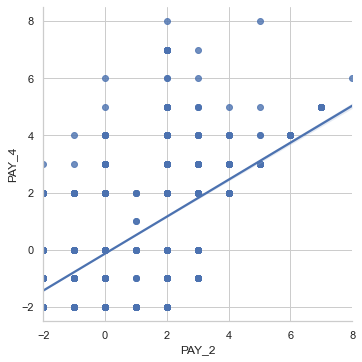

In [206]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in August 2005

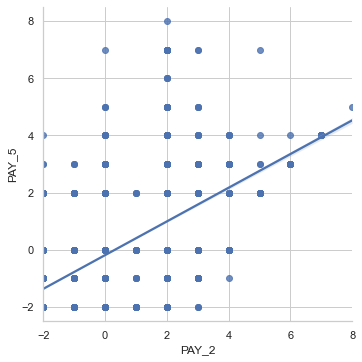

In [207]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in August 2005

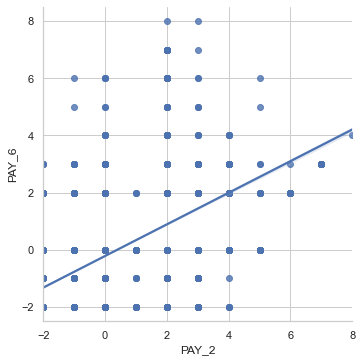

In [208]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in August 2005

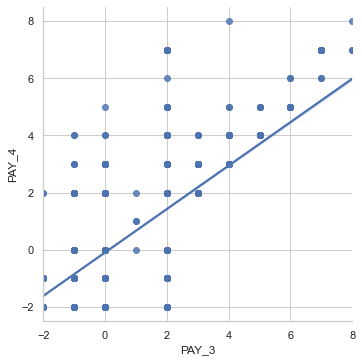

In [211]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in July 2005

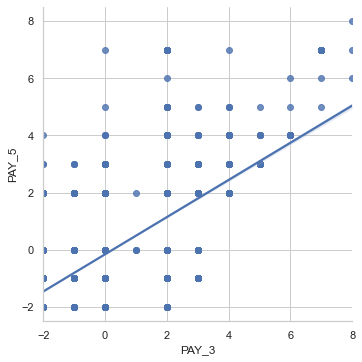

In [212]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in July 2005

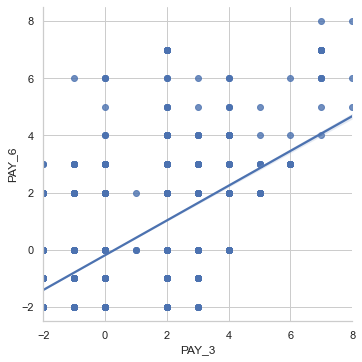

In [213]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in July 2005

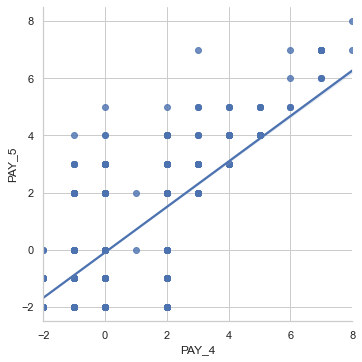

In [217]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_4", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in June 2005

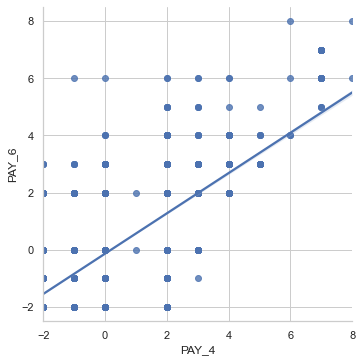

In [218]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_4", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in June 2005

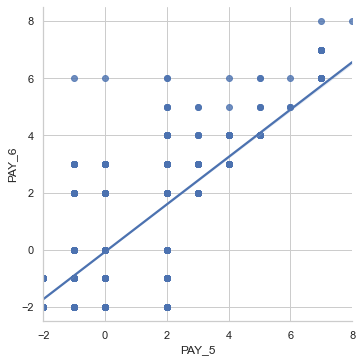

In [232]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_5", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in May 2005

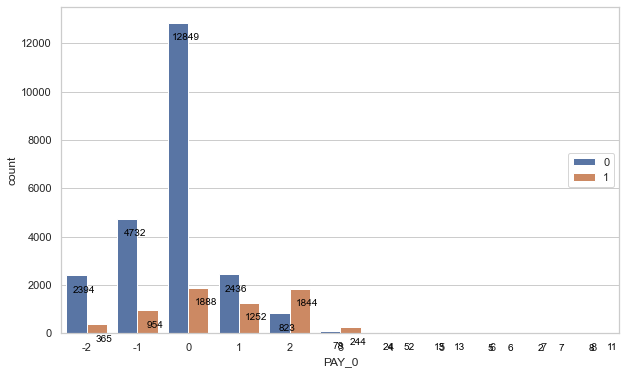

In [111]:
ca = sns.countplot(x="PAY_0", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in September 2005
- people who have delayed payment for 3(1 on the x axis) and 2(-1 on the x axis) months pass as a red flag for September 2005

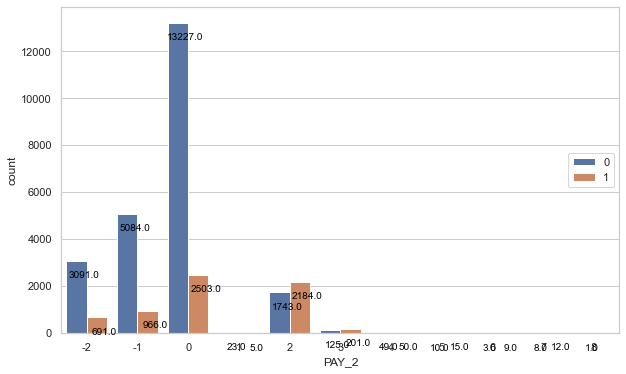

In [112]:
ca = sns.countplot(x="PAY_2", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in August 2005
- people who have delayed payment for 2(-1 on the x axis) and 1(-2 on the x axis) months pass as a red flag for August 2005

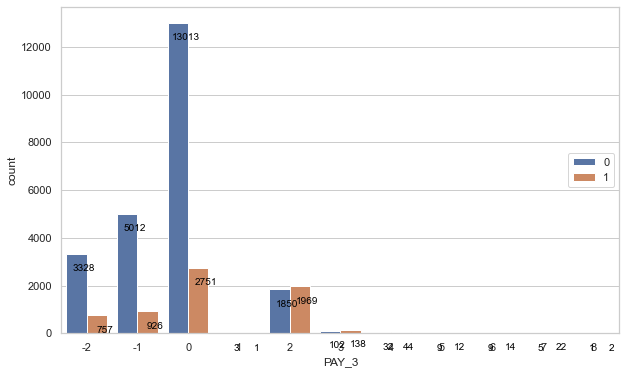

In [113]:
ca = sns.countplot(x="PAY_3", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in July 2005
- people who have delayed payment for 2(-1 on the x axis) and 1(-2 on the x axis) months pass as a red flag for July 2005

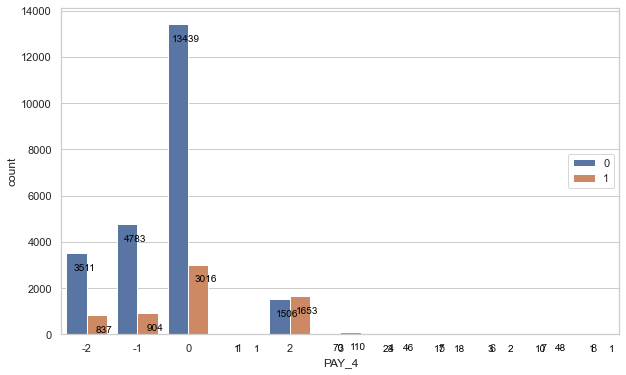

In [114]:
ca = sns.countplot(x="PAY_4", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in June 2005
- people who have delayed payment for 2(-1 on the x axis) and 1(-2 on the x axis) months pass as a red flag for June 2005

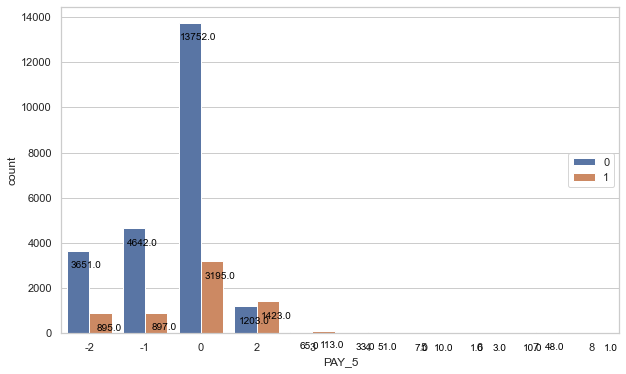

In [115]:
ca = sns.countplot(x="PAY_5", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in May 2005
- people who have delayed payment for 2(-1 on the x axis) and 1(-2 on the x axis) months pass as a red flag for May 2005

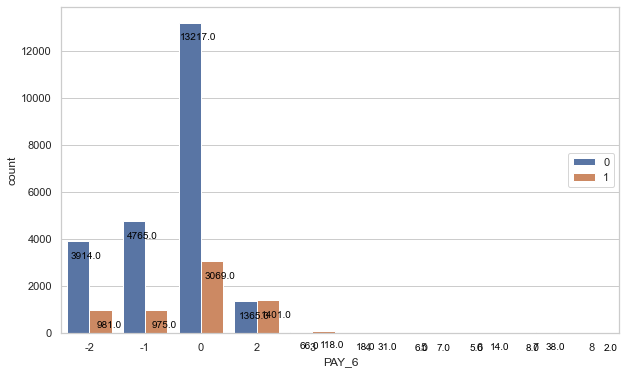

In [116]:
ca = sns.countplot(x="PAY_6", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- people who have delayed payments for 4(2 on the x axis) and 5(3 on the x axis) months have defaulted more than others at an efficient rate in August 2005
- people who have delayed payment for 2(-1 on the x axis) and 1(-2 on the x axis) months pass as a red flag for August 2005 

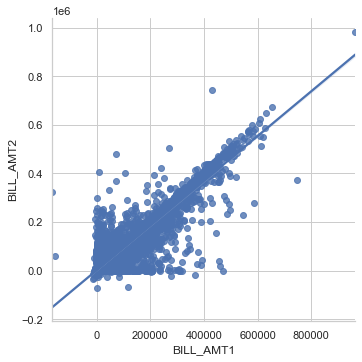

In [234]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT2" , data=credit)

As the amount on each credit loan user's bill statement increases in August 2005(BILL_AMT2) it also increases in September 2005(BILL_AMT1)

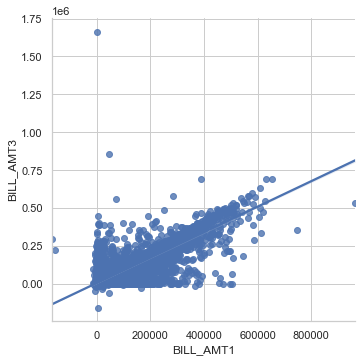

In [229]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT3" , data=credit)

As the amount on each credit loan user's bill statement increases in July 2005(BILL_AMT3) it also increases in September 2005(BILL_AMT1)

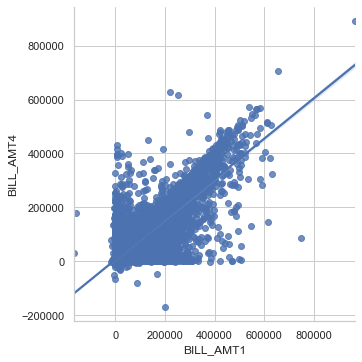

In [230]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in September 2005(BILL_AMT1)

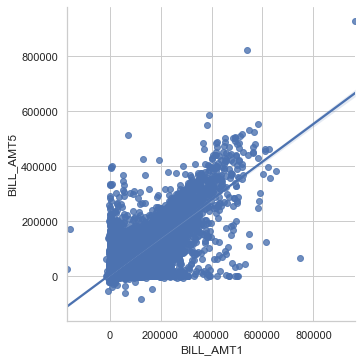

In [231]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in September 2005(BILL_AMT1)

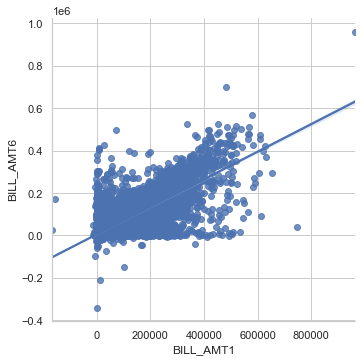

In [235]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in September 2005(BILL_AMT1)

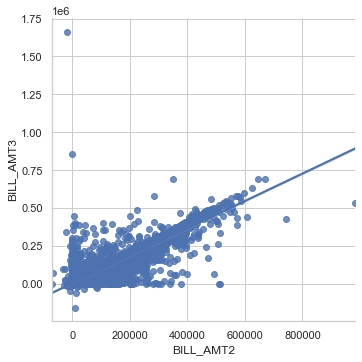

In [236]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT3" , data=credit)

As the amount on each credit loan user's bill statement increases in July 2005(BILL_AMT3) it also increases in August 2005(BILL_AMT2)

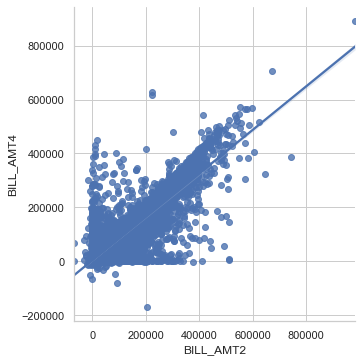

In [237]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in August 2005(BILL_AMT2)

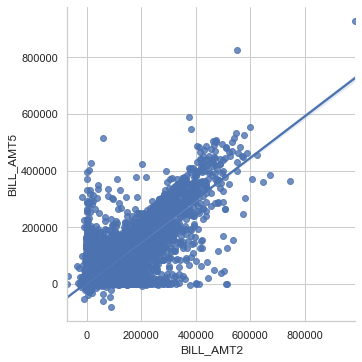

In [238]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in August 2005(BILL_AMT2)

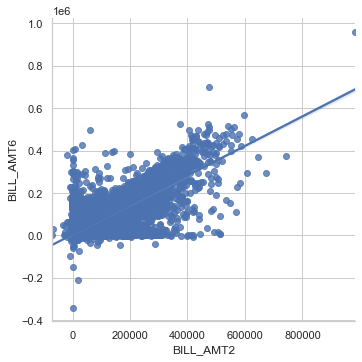

In [239]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in August 2005(BILL_AMT2)

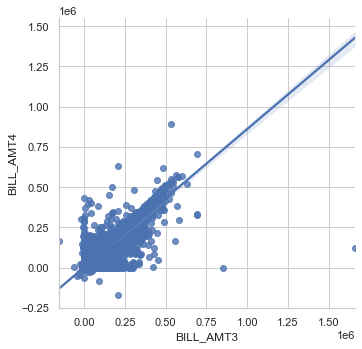

In [240]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in July 2005(BILL_AMT3)

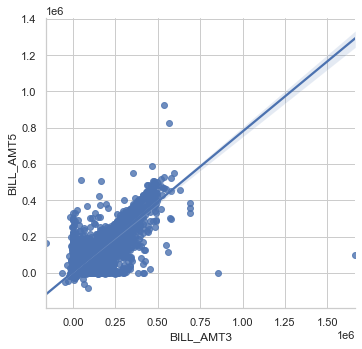

In [241]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in July 2005(BILL_AMT3)

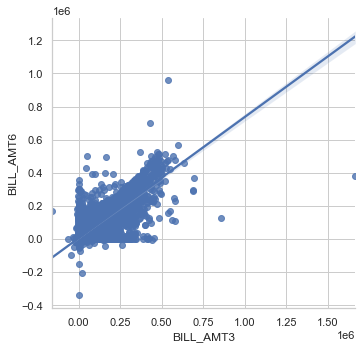

In [242]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in July 2005(BILL_AMT3)

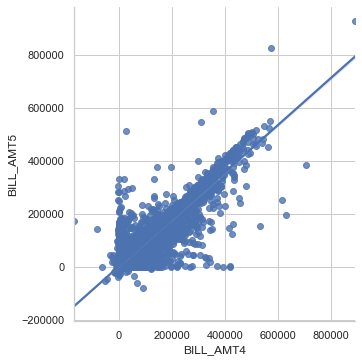

In [243]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT4", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in June 2005(BILL_AMT4)

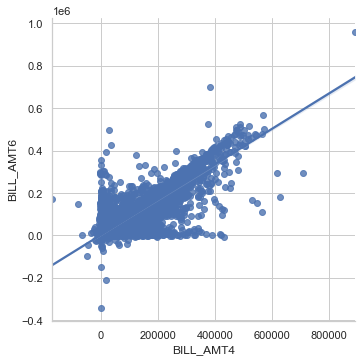

In [244]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT4", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT5) it also increases in June 2005(BILL_AMT4)

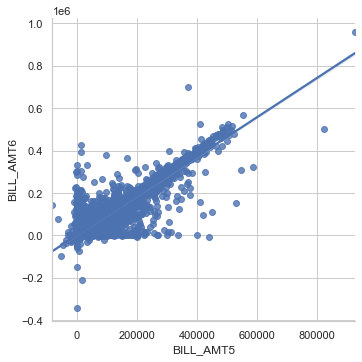

In [245]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT5", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in May 2005(BILL_AMT5)

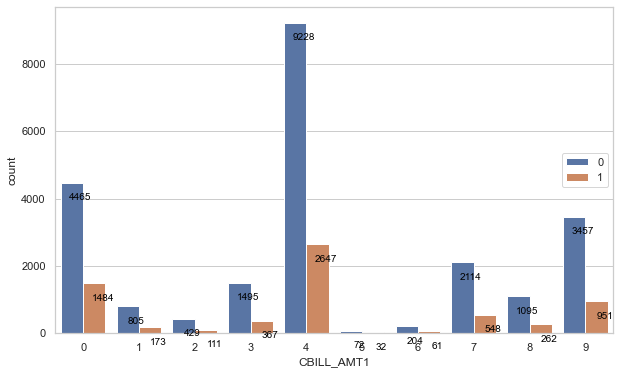

In [171]:
ca = sns.countplot(x="CBILL_AMT1", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 4 & 0 of amount of bill statement(CBILL_AMT1) have the highest amount of defaulters for September 2005
- They are followed by Clusters 9, 3, and 8

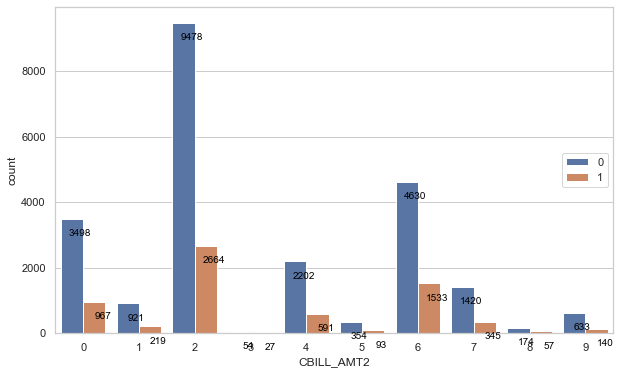

In [172]:
ca = sns.countplot(x="CBILL_AMT2", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 2 & 6 of amount of bill statement(CBILL_AMT2) have the highest amount of defaulters for August 2005
- They are followed by Clusters 0, 4, and 7

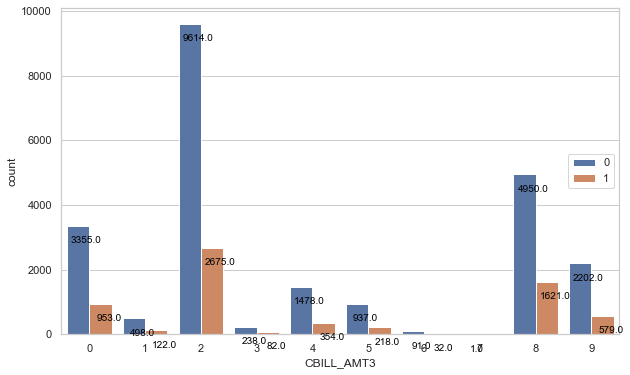

In [173]:
ca = sns.countplot(x="CBILL_AMT3", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 2 & 8 of amount of bill statement(CBILL_AMT3) have the highest amount of defaulters for July 2005
- They are followed by Clusters 0, 9, and 4

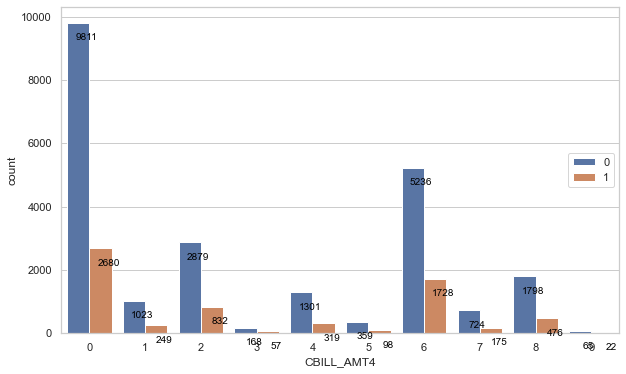

In [174]:
ca = sns.countplot(x="CBILL_AMT4", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 0 & 6 of amount of bill statement(CBILL_AMT4) have the highest amount of defaulters for June 2005
- They are followed by Clusters 2, 8, and 4

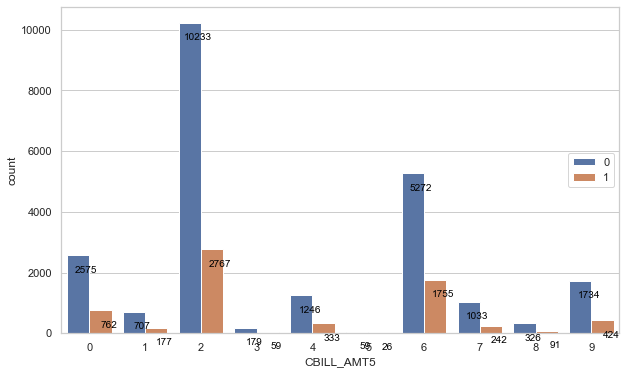

In [175]:
ca = sns.countplot(x="CBILL_AMT5", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 2 & 6 of amount of bill statement(CBILL_AMT4) have the highest amount of defaulters for May 2005
- They are followed by Clusters 0, 9, and 4

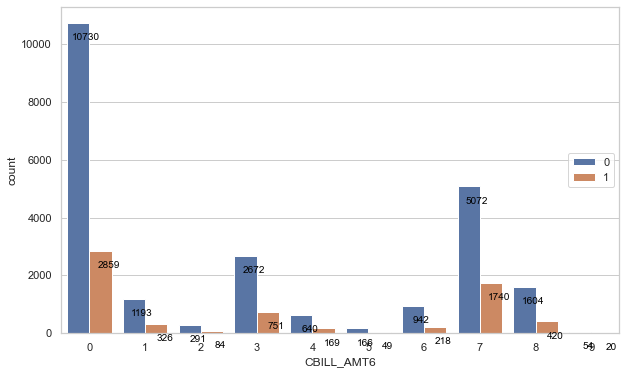

In [176]:
ca = sns.countplot(x="CBILL_AMT6", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The people in clusters 0 & 7 of amount of bill statement(CBILL_AMT6) have the highest amount of defaulters for April 2005
- They are followed by Clusters 3, 8, and 1

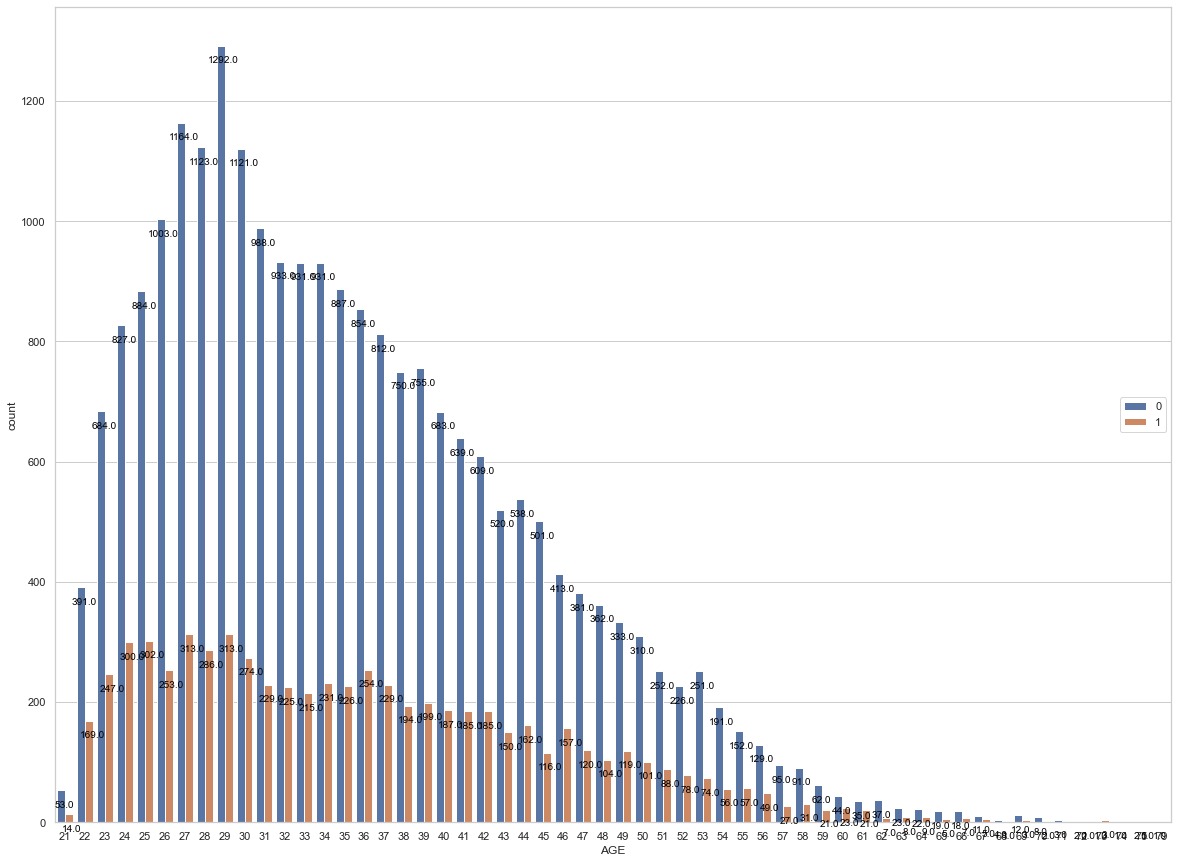

In [253]:
ca = sns.countplot(x="AGE", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

A good number of defaulters are of ages 22-56

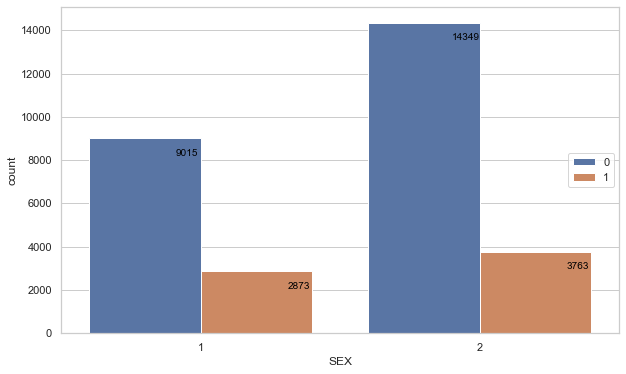

In [278]:
ca = sns.countplot(x="SEX", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Females default much more than males. Although they also outnumber males in total as credit loan users

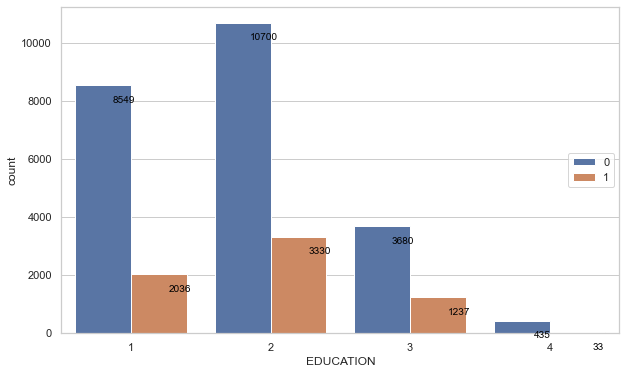

In [249]:
othersE = (credit.EDUCATION==0)|(credit.EDUCATION==5)|(credit.EDUCATION==6)
credit.loc[othersE,'EDUCATION']=4

ca = sns.countplot(x="EDUCATION", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- University students have the highest rate of defaulters
- They are followed by graduate school students

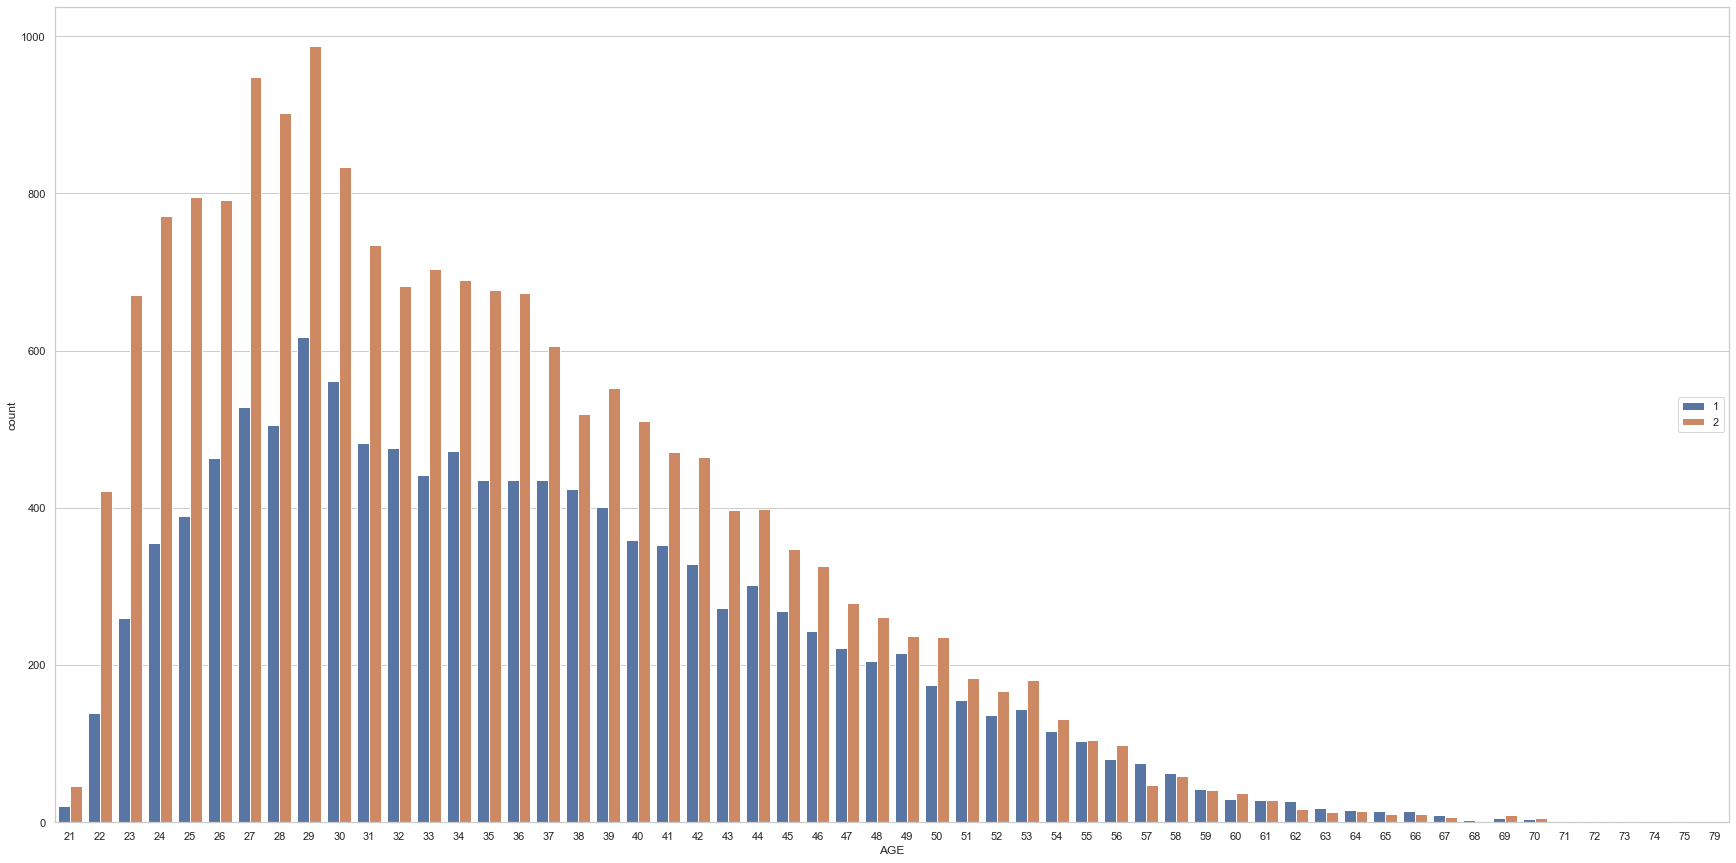

In [263]:
ca = sns.countplot(x="AGE", hue="SEX", data=credit)
plt.gcf().set_size_inches(30,15)
plt.legend(loc='right')
plt.show()

Most of the credit loan owners ages 21-56 are Females

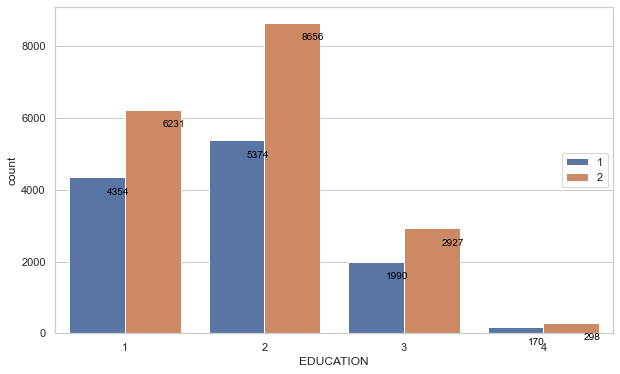

In [251]:
ca = sns.countplot(x="EDUCATION", hue="SEX", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

More female credit loan owners pursue education than the males

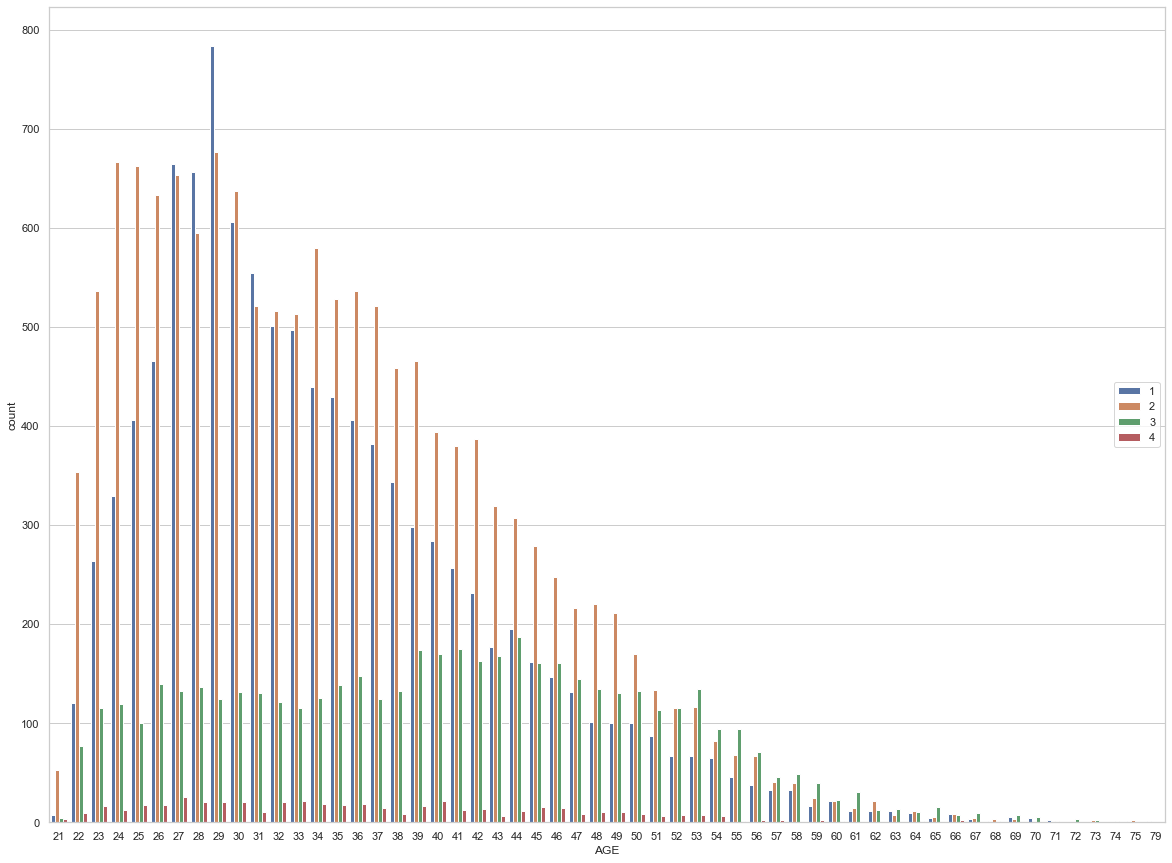

In [255]:
ca = sns.countplot(x="AGE", hue="EDUCATION", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
plt.show()

- Most of the credit loan owners are University students of ages 21-51
- graduate students also make up for a good number of credit loan users

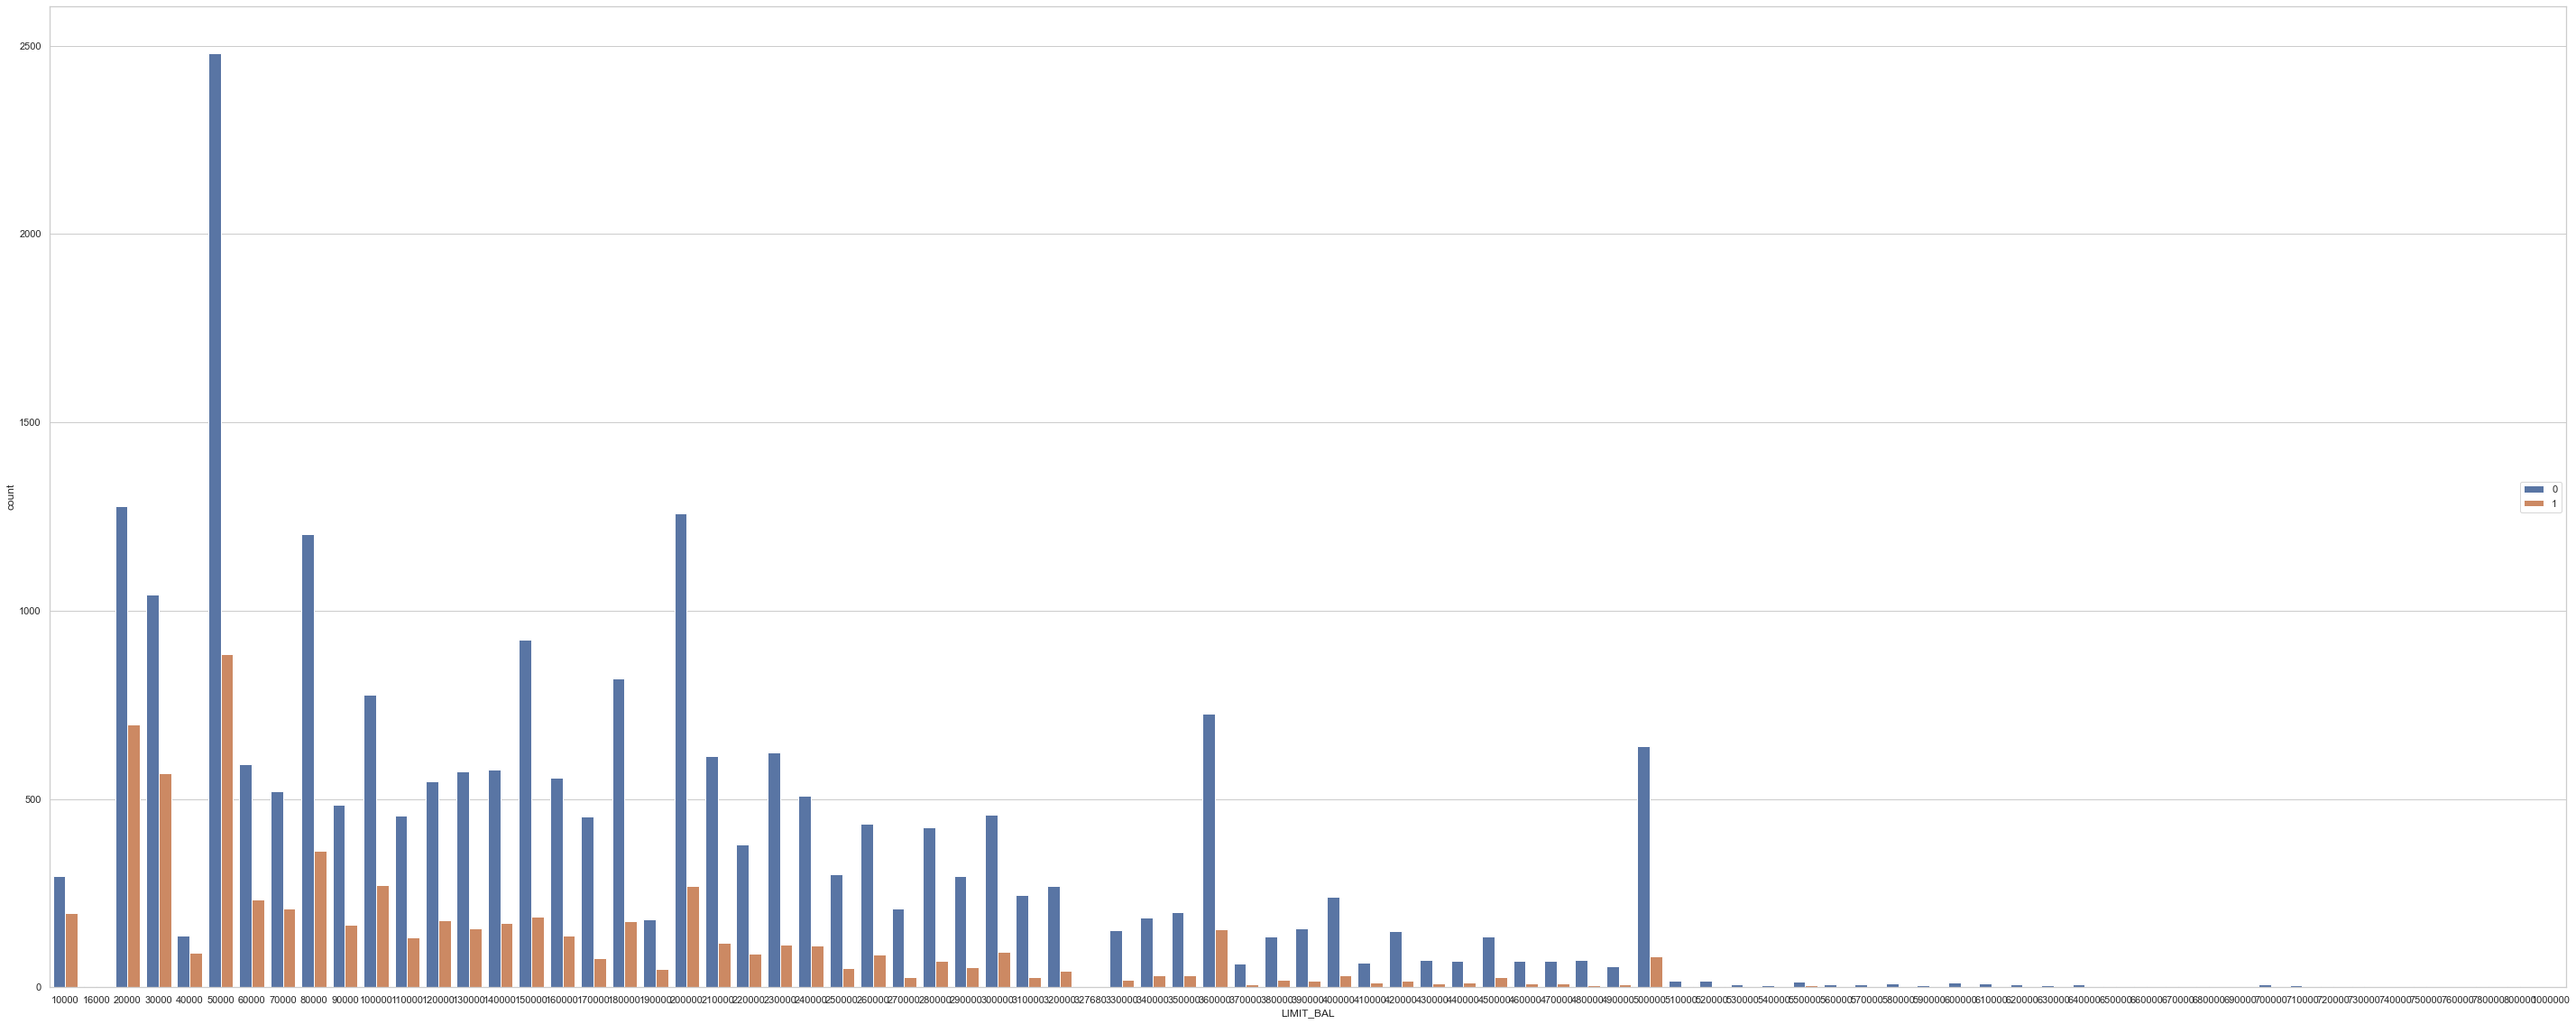

In [260]:
ca = sns.countplot(x="LIMIT_BAL", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

- People with a limit balance on credit of 50000, 20000, 30000, and 80000 have the highest rate of defaulters respectively

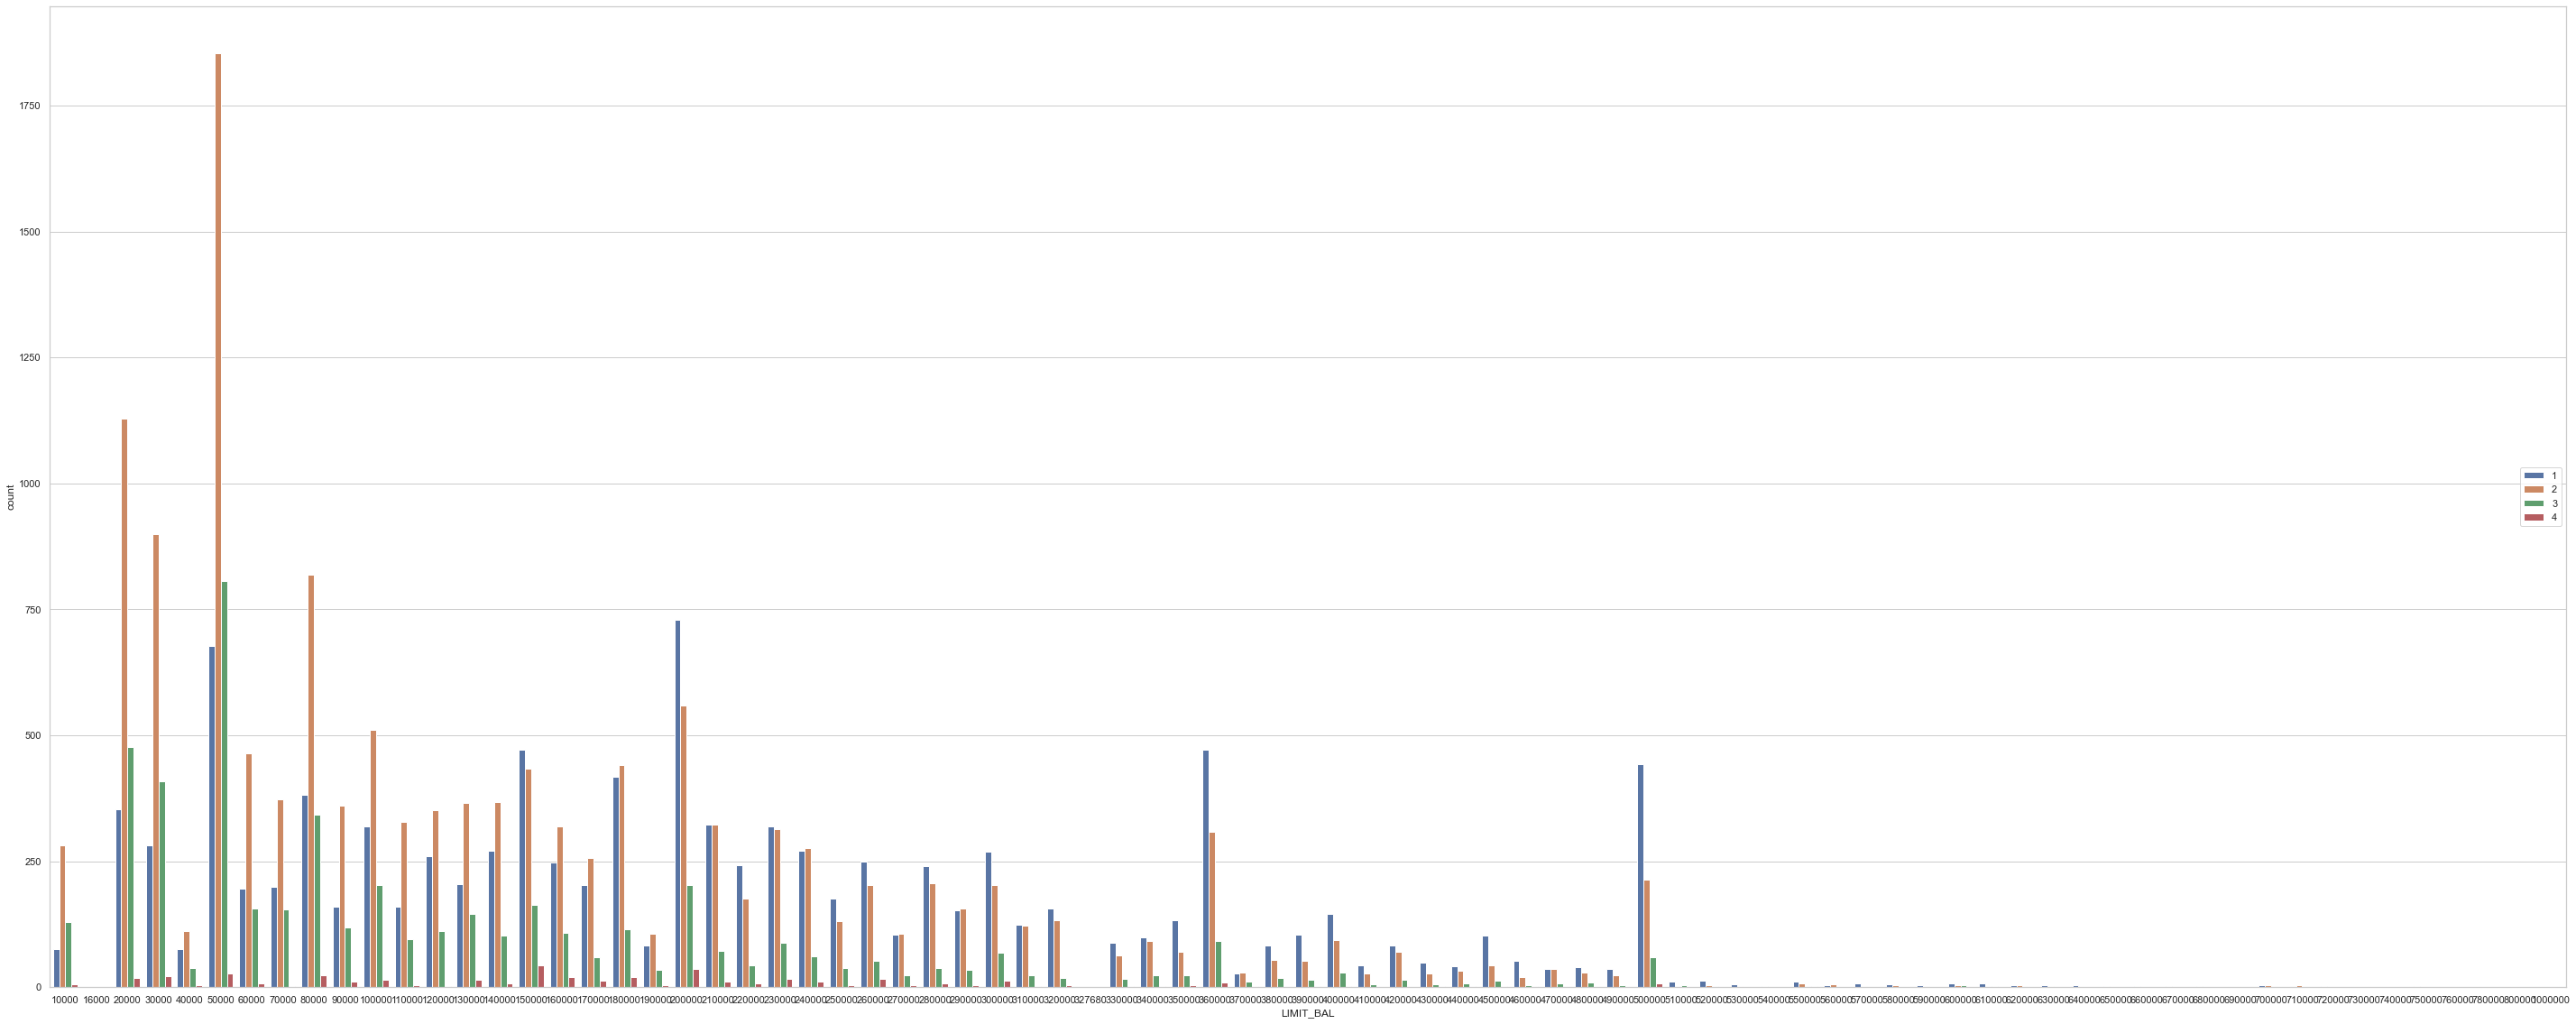

In [264]:
ca = sns.countplot(x="LIMIT_BAL", hue="EDUCATION", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

University students make up for most of the credit loan users with limit balance ranging from 10000-140000 (a range known to have a high rate of defaulters)

- university students are the major credit loan users with a LIMIT_BAL of 50000 (known to be the account limit with the highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 20000 (known to be the account limit with the second highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 30000 (known to be the account limit with the third highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 80000 (known to be the account limit with the fourth highest number of defaulters)

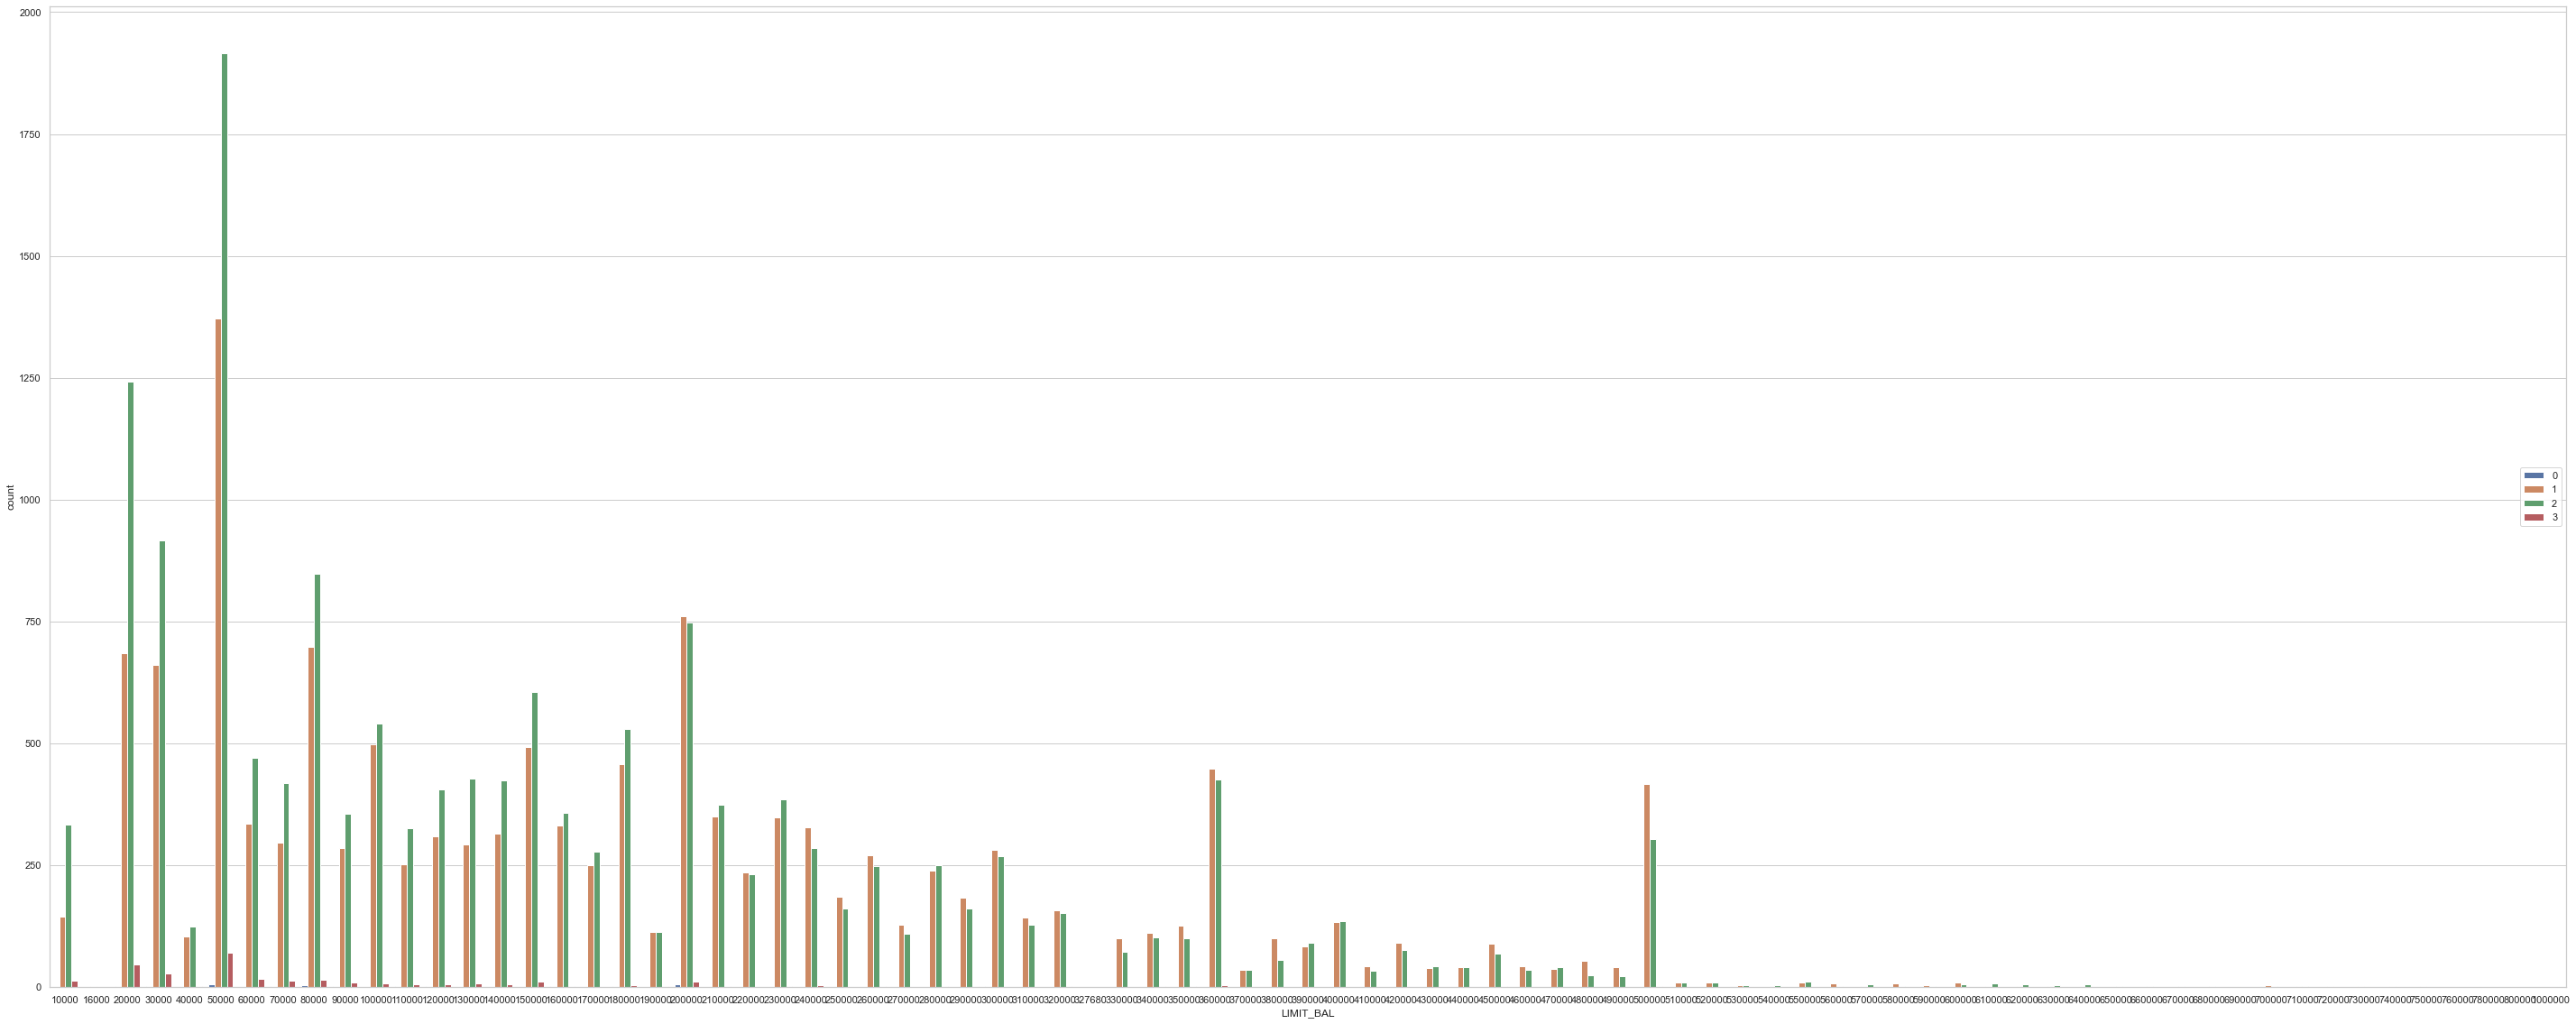

In [266]:
ca = sns.countplot(x="LIMIT_BAL", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

University students make up for most of the credit loan users with limit balance ranging from 10000-140000 (a range known to have a high rate of defaulters)

- Single people are the major credit loan users with a LIMIT_BAL of 50000 (known to be the account limit with the highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 20000 (known to be the account limit with the second highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 30000 (known to be the account limit with the third highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 80000 (known to be the account limit with the fourth highest number of defaulters)

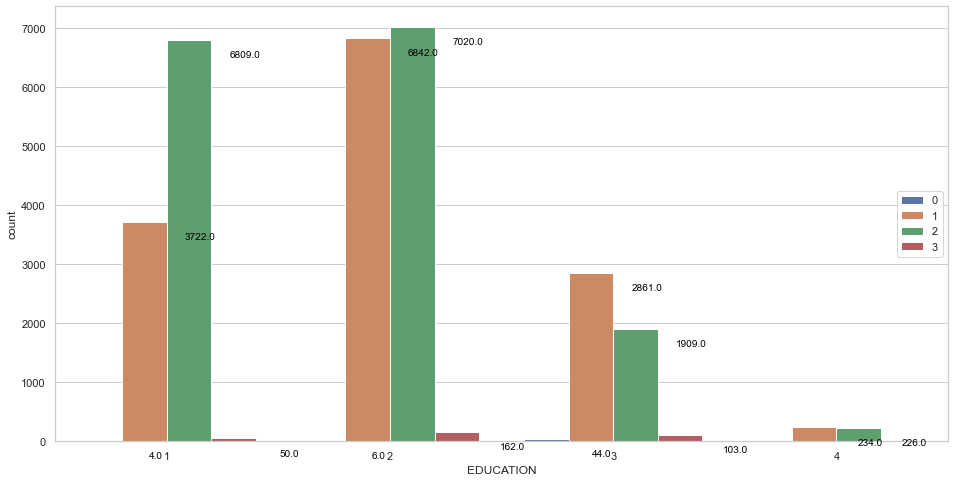

In [277]:
ca = sns.countplot(x="EDUCATION", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(16,8)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Most Single and married Credit loan users are graduate and university students

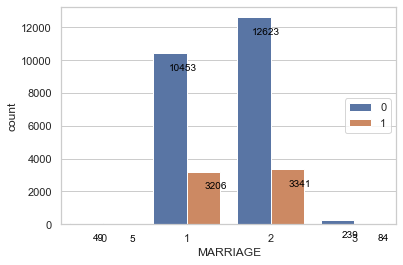

In [274]:
ca = sns.countplot(x="MARRIAGE", hue="DEFAULTERS", data=credit)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Both Married and single credit loan users default at the same rate

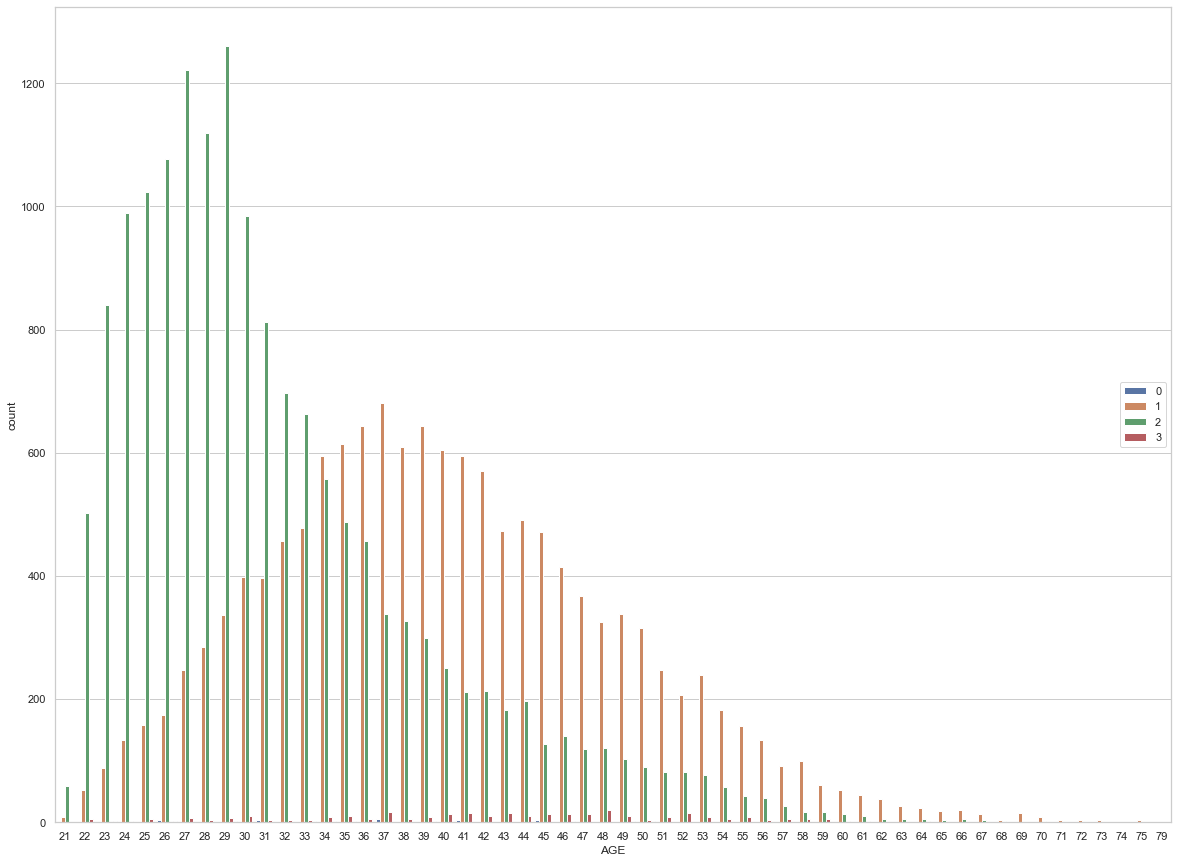

In [276]:
othersM = (credit.MARRIAGE==4)
credit.loc[othersM,'MARRIAGE']=3

ca = sns.countplot(x="AGE", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
plt.show()

- Most single credit loan users are of ages 21-33
- Most married credit loan users are of ages 34-56

# Profile of people likely to default in thier next payment from my analysis

From my analysis LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT4, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT6 have proven to be contributing factors in determining whether a credit loan user would default on the next payment.

A person who would likely defaults on the next payment would usually;
1. have delayed payments for at least 2 months 
2. have had their amount of bill statement increased for 2 consecutive months
3. be a single university or graduate student of age 21-33 if they meet they meet conditions 1 & 2 (especially females)
4. be a married university or graduate student of age 34-56 if they meet they meet conditions 1 & 2 (especially females)
5. be a university student with a limit balance of 20000, 30000, 50000, and 80000 (especially single people)